In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [2]:
# Load the dataset
file_path = ("C:\\Users\\devika\\OneDrive\\Desktop\\p443.CSV") # Replace with your file path
data = pd.read_csv("C:\\Users\\devika\\OneDrive\\Desktop\\p443.CSV")


In [3]:
# Display the first few rows
data.head()

title    price  \
0    CLYMB Outdoor Sports Running Shoes for Mens Boy  ₹279.00   
1              Bourge Men's Loire-z126 Running Shoes  ₹479.00   
2                               T-Rock Men's Sneaker  ₹430.00   
3  Robbie jones Sneakers Casual Canvas Fabric Col...  ₹499.00   
4                       Sparx Men's Sd0323g Sneakers  ₹499.00   

               rating  total_reviews  \
0  2.9 out of 5 stars   2389 ratings   
1  3.9 out of 5 stars  11520 ratings   
2  3.3 out of 5 stars   1251 ratings   
3  4.2 out of 5 stars      3 ratings   
4  4.2 out of 5 stars  20110 ratings   

                                 product_description  \
0  Elevate your style with this classy pair of Ru...   
1  The product will be an excellent pick for you....   
2  Flaunt with these stylish and unique red casua...   
3  Robbie Jones Shoes Are Designed To Keeping In ...   
4  Sparx is a spectacular range of footwear from ...   

                                             reviews  \
0  Not happy with product|| It's not as expected....   
1  Memory cushioning in these shoes is the best f...   
2  Worth to its amount|| Go for it|| Perfect|| 5 ...   
3  Sup quality|| Good but not expected|| Awesome 👌.!   
4  Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...   

                                      reviews_rating Shoe Type  \
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men   
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men   
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men   
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   

                                     cleaned_reviews  sentiment  \
0  Not happy with product   It s not as expected ...  -0.115909   
1  Memory cushioning in these shoes is the best f...   0.571364   
2  Worth to its amount   Go for it   Perfect   5 ...   0.225000   
3  Sup quality   Good but not expected   Awesome       0.583333   
4  Best   Satisfied    Affordable beauty      the...   0.360000   

  sentiment_label  
0        Negative  
1        Positive  
2        Positive  
3        Positive  
4        Positive

In [4]:
data.tail()

title     price  \
1225              Nike Men's React Vision Running Shoes  ₹7256.00   
1226     Puma Men's B.O.G Limitless Hi Evoknit Sneakers  ₹5822.00   
1227  new balance Women's FuelCell Echolucent Runnin...  ₹5362.00   
1228  Nike Women's WMNS Air Zoom Pegasus 37 Running ...  ₹7480.00   
1229      ASICS Women Gt-2000 7 Lite-Show Running Shoes  ₹5719.00   

                  rating total_reviews  \
1225  4.4 out of 5 stars   200 ratings   
1226  4.3 out of 5 stars    25 ratings   
1227  4.5 out of 5 stars   817 ratings   
1228  4.5 out of 5 stars    67 ratings   
1229  4.1 out of 5 stars   210 ratings   

                                    product_description  \
1225  The Nike react vision is a STORY of surreal co...   
1226  The B.O.G limitless is Puma's key style for th...   
1227  Lead the pack in New Balance’s Echolucent snea...   
1228  Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...   
1229  The GT-2000 7 achieves a reassuringly firm rid...   

                                                reviews  \
1225  Must buy|| not have a great fiting but great q...   
1226  Worth buying !|| Classy Bold and Stylish !!|| ...   
1227  size variation in product recd n size chart|| ...   
1228  Verified Purchase|| Verified Purchase|| Verifi...   
1229  Great shoe|| excellent quality|| Old manufactu...   

                                         reviews_rating Shoe Type  \
1225  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...     Women   
1226  4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...     Women   
1227  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...     Women   
1228  5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...     Women   
1229  5.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...     Women   

                                        cleaned_reviews  sentiment  \
1225  Must buy   not have a great fiting but great q...   0.800000   
1226  Worth buying     Classy Bold and Stylish      ...   0.483030   
1227  size variation in product recd n size chart   ...   0.000000   
1228  Verified Purchase   Verified Purchase   Verifi...   0.000000   
1229  Great shoe   excellent quality   Old manufactu...   0.622222   

     sentiment_label  
1225        Positive  
1226        Positive  
1227         Neutral  
1228         Neutral  
1229        Positive

In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

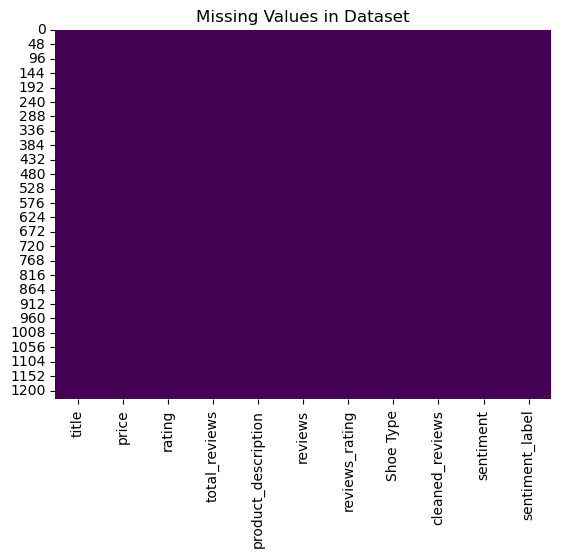

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize missing values using a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

In [7]:
# Check for column names and their types
print(f"Column names: {data.columns}")

Column names: Index(['title', 'price', 'rating', 'total_reviews', 'product_description',
       'reviews', 'reviews_rating', 'Shoe Type', 'cleaned_reviews',
       'sentiment', 'sentiment_label'],
      dtype='object')


In [8]:
# Display the 'price' column
print(data['price'])

0        ₹279.00
1        ₹479.00
2        ₹430.00
3        ₹499.00
4        ₹499.00
          ...   
1225    ₹7256.00
1226    ₹5822.00
1227    ₹5362.00
1228    ₹7480.00
1229    ₹5719.00
Name: price, Length: 1230, dtype: object


In [9]:
# Display the 'total_reviews' column
print(data['total_reviews'])

0        2389 ratings
1       11520 ratings
2        1251 ratings
3           3 ratings
4       20110 ratings
            ...      
1225      200 ratings
1226       25 ratings
1227      817 ratings
1228       67 ratings
1229      210 ratings
Name: total_reviews, Length: 1230, dtype: object


In [10]:
# Display the 'reviews_rating' column
print(data['reviews_rating'])

0       1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...
1       5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...
2       5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
3       5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...
4       5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
                              ...                        
1225    5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...
1226    4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...
1227    5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...
1228    5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...
1229    5.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...
Name: reviews_rating, Length: 1230, dtype: object


In [11]:
# Display the 'rating' column
print(data['rating'])

0       2.9 out of 5 stars
1       3.9 out of 5 stars
2       3.3 out of 5 stars
3       4.2 out of 5 stars
4       4.2 out of 5 stars
               ...        
1225    4.4 out of 5 stars
1226    4.3 out of 5 stars
1227    4.5 out of 5 stars
1228    4.5 out of 5 stars
1229    4.1 out of 5 stars
Name: rating, Length: 1230, dtype: object


In [12]:
# Check the basic info of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1230 non-null   object 
 1   price                1230 non-null   object 
 2   rating               1230 non-null   object 
 3   total_reviews        1230 non-null   object 
 4   product_description  1230 non-null   object 
 5   reviews              1230 non-null   object 
 6   reviews_rating       1230 non-null   object 
 7   Shoe Type            1230 non-null   object 
 8   cleaned_reviews      1230 non-null   object 
 9   sentiment            1230 non-null   float64
 10  sentiment_label      1230 non-null   object 
dtypes: float64(1), object(10)
memory usage: 105.8+ KB
None


In [13]:
# Get the data types of each column
print(f"Data types of each column:\n{data.dtypes}")

Data types of each column:
title                   object
price                   object
rating                  object
total_reviews           object
product_description     object
reviews                 object
reviews_rating          object
Shoe Type               object
cleaned_reviews         object
sentiment              float64
sentiment_label         object
dtype: object


In [14]:
# Check the shape of the dataset (rows, columns)
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (1230, 11)


In [15]:
# Assuming a text column exists, for example, 'reviews'
data['word_count'] = data['reviews'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['reviews'].apply(lambda x: len(str(x)))

# Display the first few rows of the new columns
data[['reviews', 'word_count', 'char_count']].head()

reviews  word_count  char_count
0  Not happy with product|| It's not as expected....          49         297
1  Memory cushioning in these shoes is the best f...          49         300
2  Worth to its amount|| Go for it|| Perfect|| 5 ...          32         182
3  Sup quality|| Good but not expected|| Awesome 👌.!           8          49
4  Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...          60         324

In [16]:
# Assuming a text column exists, for example, 'title'
data['word_count'] = data['title'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['title'].apply(lambda x: len(str(x)))

# Display the first few rows of the new columns
data[['title', 'word_count', 'char_count']].head()

title  word_count  char_count
0    CLYMB Outdoor Sports Running Shoes for Mens Boy           8          47
1              Bourge Men's Loire-z126 Running Shoes           5          37
2                               T-Rock Men's Sneaker           3          20
3  Robbie jones Sneakers Casual Canvas Fabric Col...          12          72
4                       Sparx Men's Sd0323g Sneakers           4          28

In [17]:
# Assuming a text column exists, for example, 'reviews'
data['word_count'] = data['product_description'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['product_description'].apply(lambda x: len(str(x)))

# Display the first few rows of the new columns
data[['product_description', 'word_count', 'char_count']].head()

product_description  word_count  char_count
0  Elevate your style with this classy pair of Ru...          35         222
1  The product will be an excellent pick for you....          14          78
2  Flaunt with these stylish and unique red casua...          70         398
3  Robbie Jones Shoes Are Designed To Keeping In ...         100         576
4  Sparx is a spectacular range of footwear from ...         171        1030

In [18]:
# Select all object (text) columns for analysis
text_columns = data.select_dtypes(include=['object']).columns

# Display unique values in text columns (if categories)
for col in text_columns:
    print(f"Unique values in {col}:")
    print(data[col].unique()[:5])  # Display the first 5 unique values
    print("\n")

Unique values in title:
['CLYMB Outdoor Sports Running Shoes for Mens Boy'
 "Bourge Men's Loire-z126 Running Shoes" "T-Rock Men's Sneaker"
 'Robbie jones Sneakers Casual Canvas Fabric Colour Shoes for Men and Boys'
 "Sparx Men's Sd0323g Sneakers"]


Unique values in price:
['₹279.00' '₹479.00' '₹430.00' '₹499.00' '₹449.00']


Unique values in rating:
['2.9 out of 5 stars' '3.9 out of 5 stars' '3.3 out of 5 stars'
 '4.2 out of 5 stars' '3.5 out of 5 stars']


Unique values in total_reviews:
['2389 ratings' '11520 ratings' '1251 ratings' '3 ratings' '20110 ratings']


Unique values in product_description:
['Elevate your style with this classy pair of Running Shoe from the house of CLYMB brand. Featuring a contemporary refined design with exceptional comfort this pair is perfect to give your quintessential dressing an upgrade.'
 'The product will be an excellent pick for you. It ensures an easy maintenance.'
 "Flaunt with these stylish and unique red casual shoes as per the latest fashion

In [19]:
# Analyze the length of text in each text column
for col in text_columns:
    data[f'{col}_length'] = data[col].astype(str).apply(len)

# Summary statistics for text length
data[[f'{col}_length' for col in text_columns]].describe()


title_length  price_length  rating_length  total_reviews_length  \
count   1230.000000   1230.000000         1230.0           1230.000000   
mean      42.763415      7.596748           18.0             10.561789   
std       20.524057      0.490750            0.0              0.922904   
min        5.000000      7.000000           18.0              8.000000   
25%       31.000000      7.000000           18.0             10.000000   
50%       38.000000      8.000000           18.0             11.000000   
75%       47.000000      8.000000           18.0             11.000000   
max      193.000000      8.000000           18.0             13.000000   

       product_description_length  reviews_length  reviews_rating_length  \
count                 1230.000000     1230.000000            1230.000000   
mean                   502.500000      186.657724             167.014634   
std                    805.058406       94.812516              66.269034   
min                      1.000000        3.000000              18.000000   
25%                    195.000000      123.250000             144.000000   
50%                    288.000000      197.000000             207.000000   
75%                    560.000000      249.750000             207.000000   
max                  11855.000000      471.000000             207.000000   

       Shoe Type_length  cleaned_reviews_length  sentiment_label_length  
count       1230.000000             1230.000000             1230.000000  
mean           3.608130              186.657724                7.913821  
std            0.920395               94.812516                0.280742  
min            3.000000                3.000000                7.000000  
25%            3.000000              123.250000                8.000000  
50%            3.000000              197.000000                8.000000  
75%            5.000000              249.750000                8.000000  
max            5.000000              471.000000                8.000000

In [20]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Remove duplicate rows if found
data_cleaned = data.drop_duplicates()

Number of duplicate rows: 215


In [21]:
# Summary statistics for numeric columns
print(data.describe())

         sentiment   word_count    char_count  title_length  price_length  \
count  1230.000000  1230.000000   1230.000000   1230.000000   1230.000000   
mean      0.334737    78.393496    502.500000     42.763415      7.596748   
std       0.275435   114.889375    805.058406     20.524057      0.490750   
min      -1.000000     0.000000      1.000000      5.000000      7.000000   
25%       0.156786    33.000000    195.000000     31.000000      7.000000   
50%       0.361806    47.000000    288.000000     38.000000      8.000000   
75%       0.522024    93.000000    560.000000     47.000000      8.000000   
max       1.000000  1666.000000  11855.000000    193.000000      8.000000   

       rating_length  total_reviews_length  product_description_length  \
count         1230.0           1230.000000                 1230.000000   
mean            18.0             10.561789                  502.500000   
std              0.0              0.922904                  805.058406   
min       

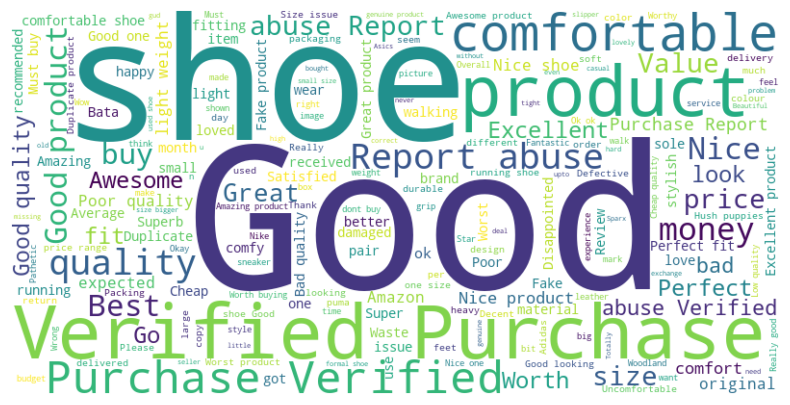

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from a column (e.g., product reviews or descriptions)
text_data = ' '.join(data['reviews'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


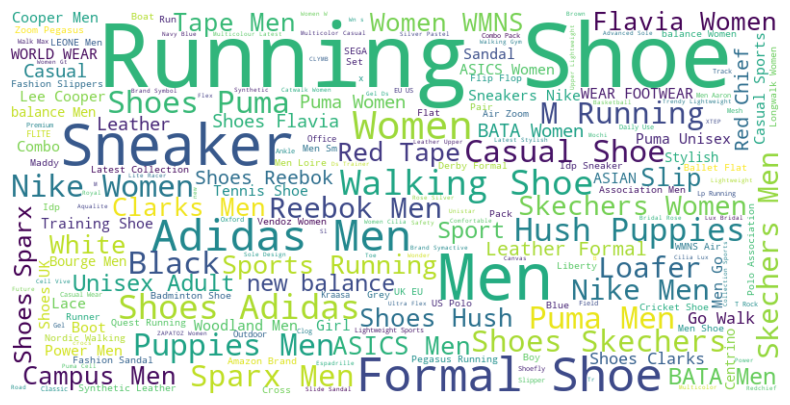

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from a column (e.g., product reviews or descriptions)
text_data = ' '.join(data['title'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

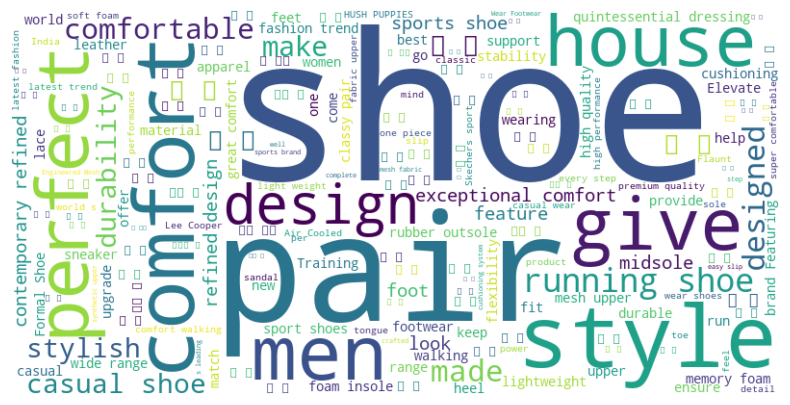

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from a column (e.g., product reviews or descriptions)
text_data = ' '.join(data['product_description'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

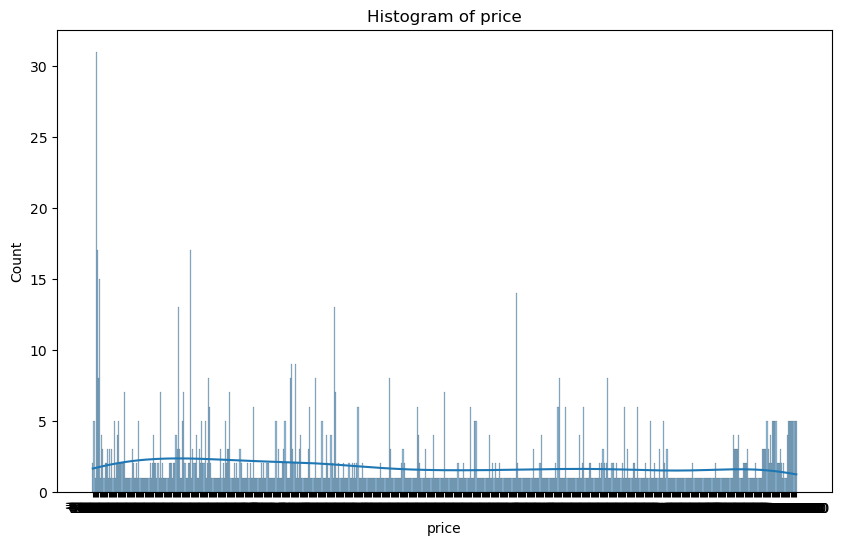

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'column_name' with the actual column you want to visualize
column_name = 'price'  # Example column, replace with your column

plt.figure(figsize=(10, 6))
sns.histplot(data[column_name], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.show()

rating    0
price     0
dtype: int64


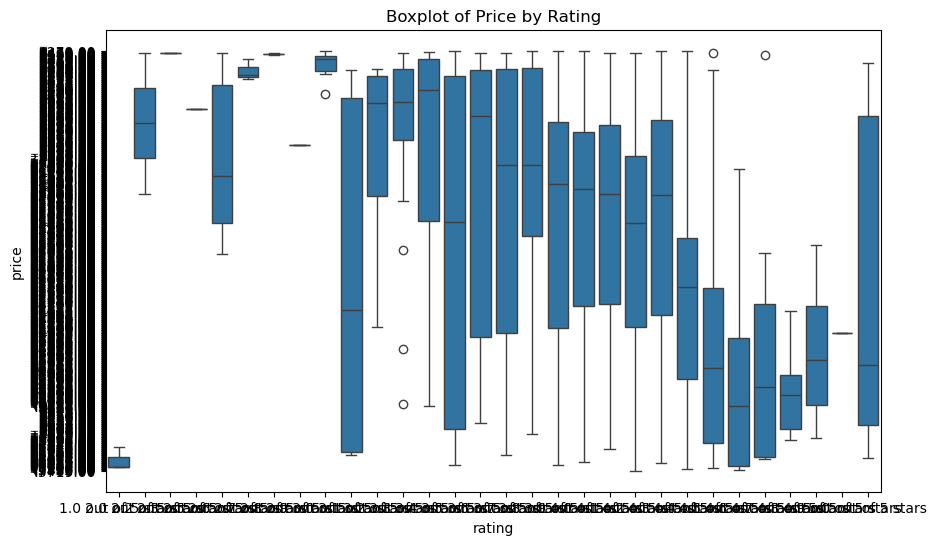

['2.9 out of 5 stars', '3.9 out of 5 stars', '3.3 out of 5 stars', '4.2 out of 5 stars', '3.5 out of 5 stars', ..., '4.6 out of 5 stars', '4.7 out of 5 stars', '4.8 out of 5 stars', '4.9 out of 5 stars', '1.0 out of 5 stars']
Length: 30
Categories (30, object): ['1.0 out of 5 stars', '2.0 out of 5 stars', '2.2 out of 5 stars', '2.3 out of 5 stars', ..., '4.7 out of 5 stars', '4.8 out of 5 stars', '4.9 out of 5 stars', '5.0 out of 5 stars']
title                           object
price                          float64
rating                        category
total_reviews                   object
product_description             object
reviews                         object
reviews_rating                  object
Shoe Type                       object
cleaned_reviews                 object
sentiment                      float64
sentiment_label                 object
word_count                       int64
char_count                       int64
title_length                     int64
price_leng

In [26]:
data['rating'] = data['rating'].astype('category')
data = data.dropna(subset=['rating', 'price'])  # Dropping rows with missing values
print(data[['rating', 'price']].isnull().sum())  # Check for missing values

# Drop rows with missing values
data_cleaned = data.dropna(subset=['rating', 'price'])
data['price'] = pd.to_numeric(data['price'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='price', data=data_cleaned)  # Ensure data is cleaned
plt.title('Boxplot of Price by Rating')
plt.show()

print(data['rating'].unique())  # Check unique values of 'rating'
print(data.dtypes)  # Check the data types of columns


C:\Users\devika\AppData\Local\Temp\ipykernel_508\1912899808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', palette='Set3')


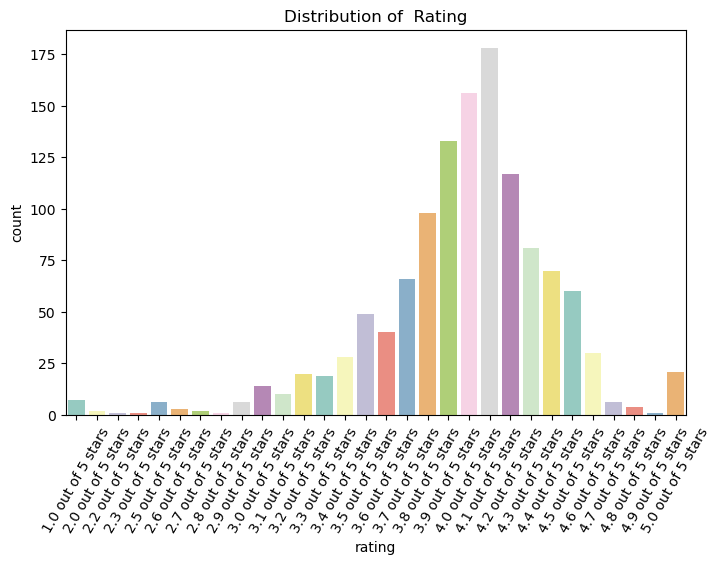

In [27]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='rating', palette='Set3')
plt.title('Distribution of  Rating')
plt.xticks(rotation=60)
plt.show()

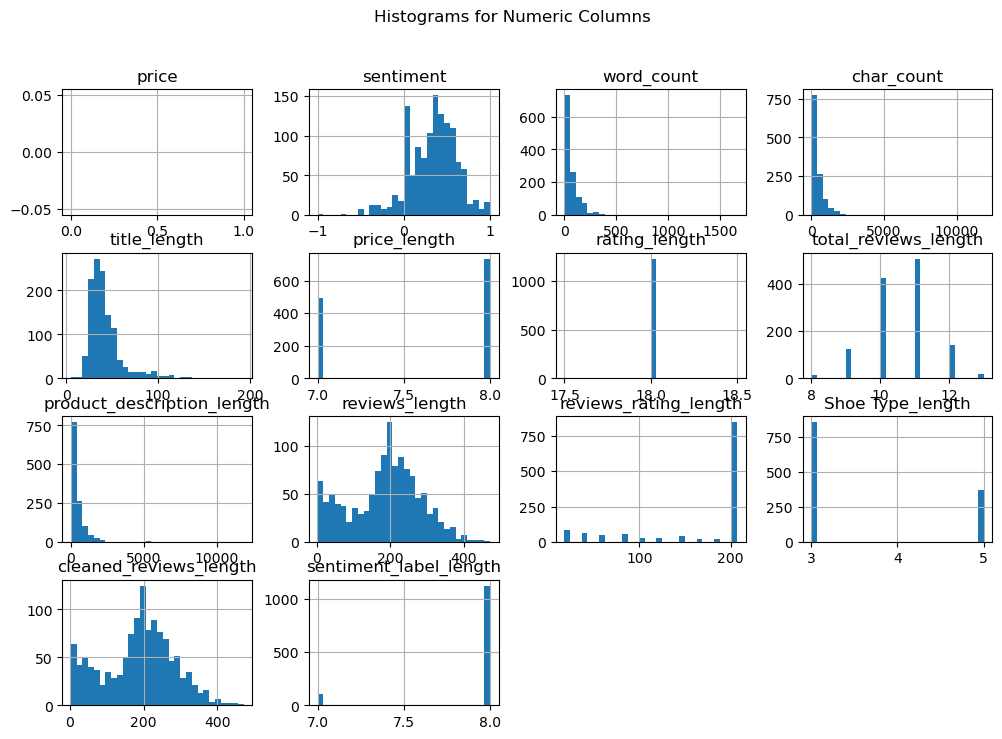

In [28]:
# Plot histograms for all numeric columns
data.hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms for Numeric Columns')
plt.show()

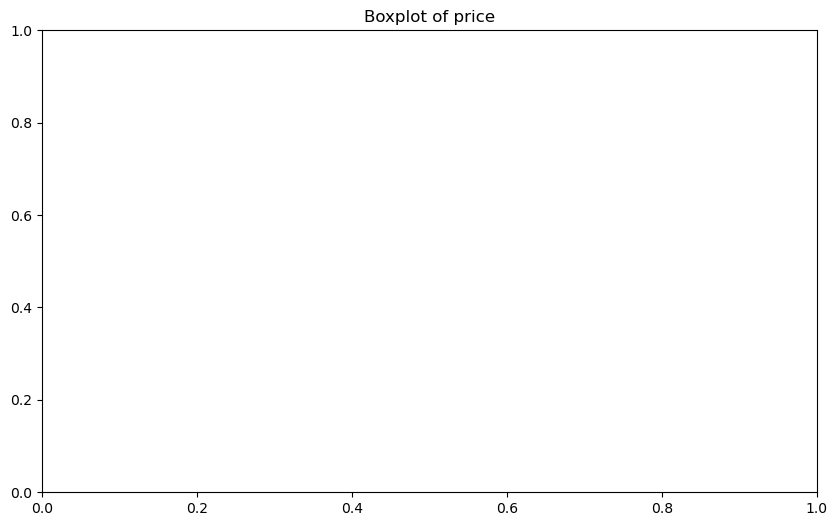

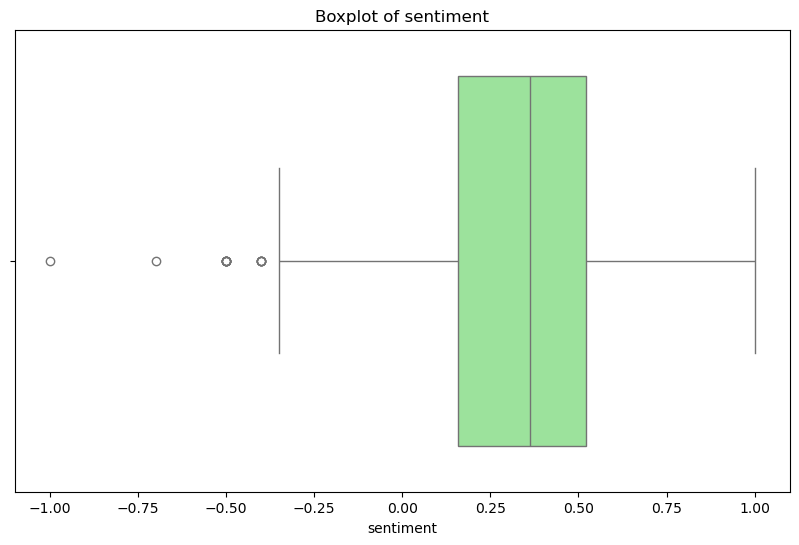

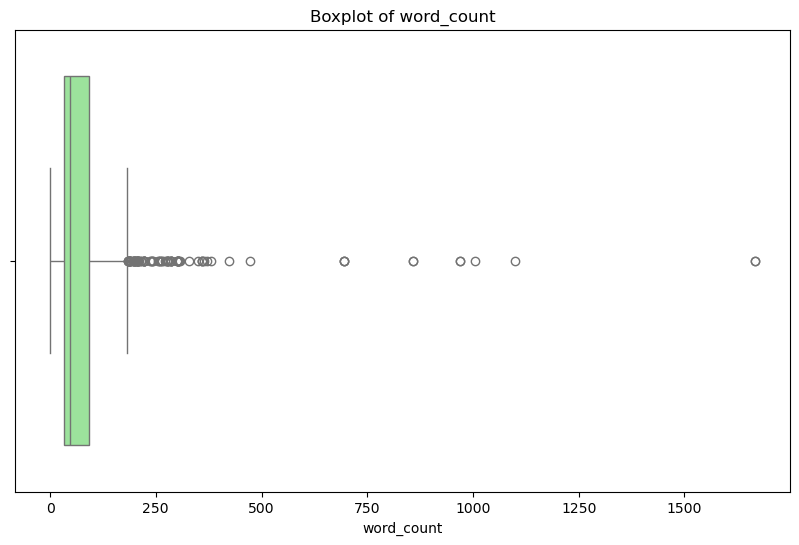

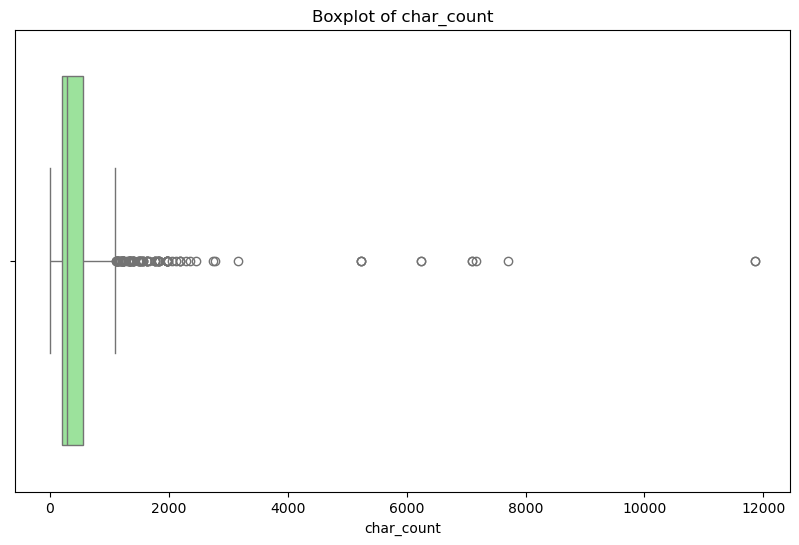

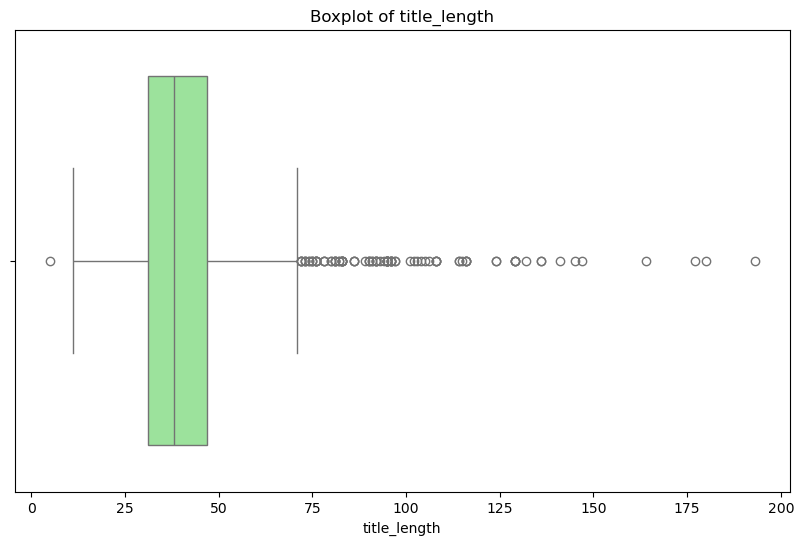

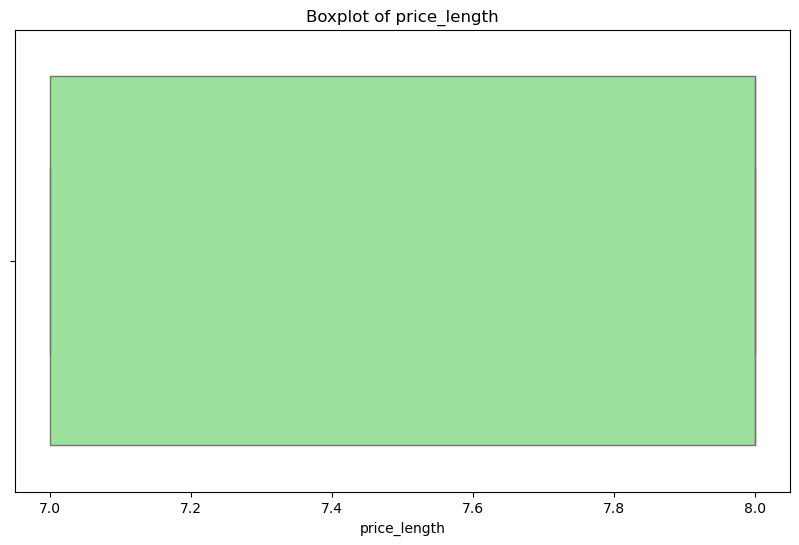

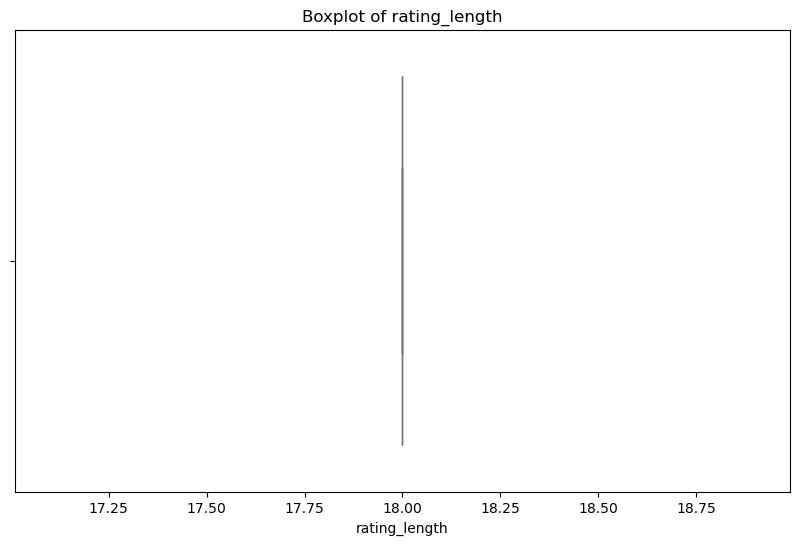

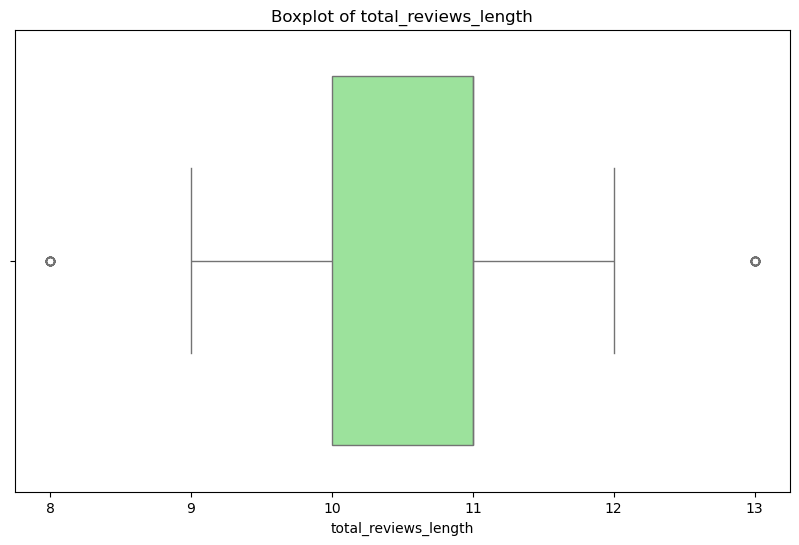

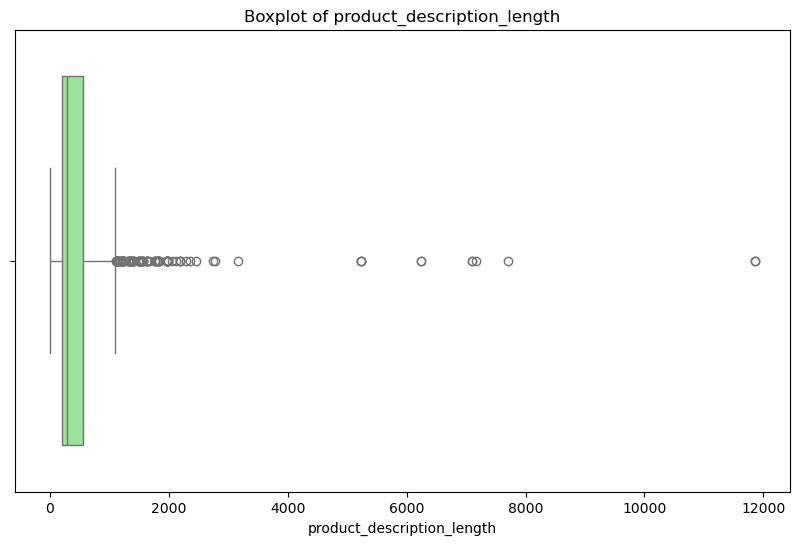

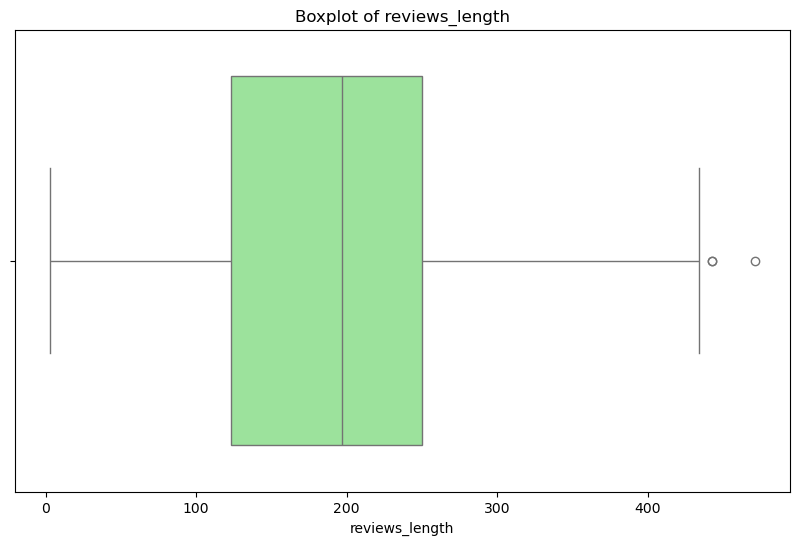

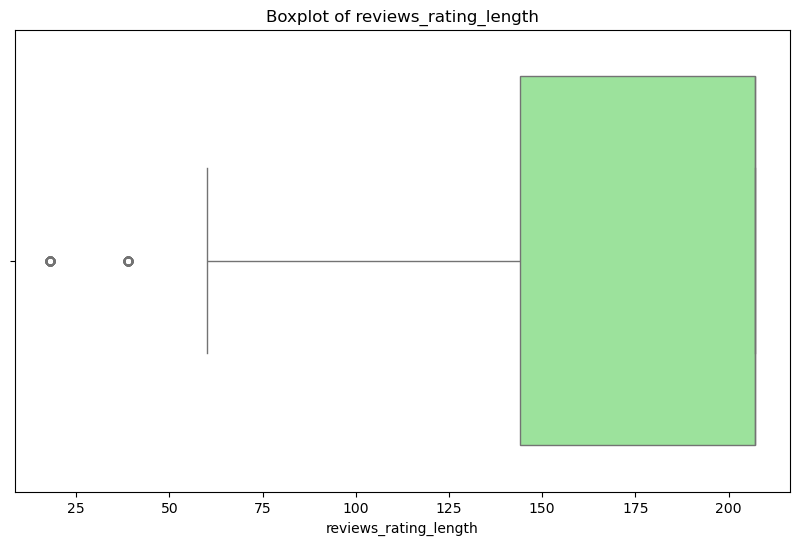

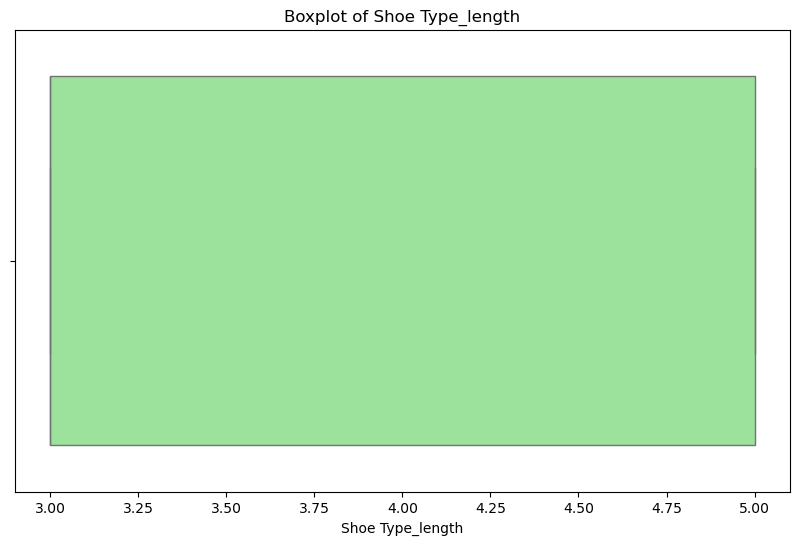

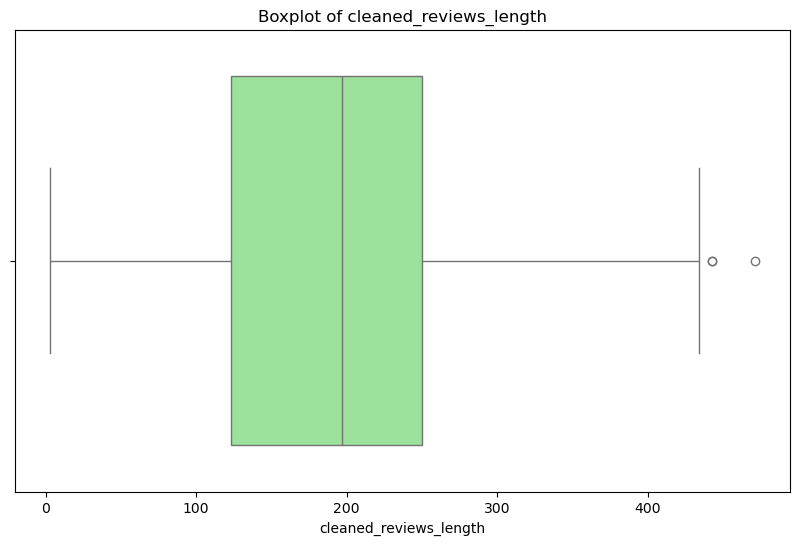

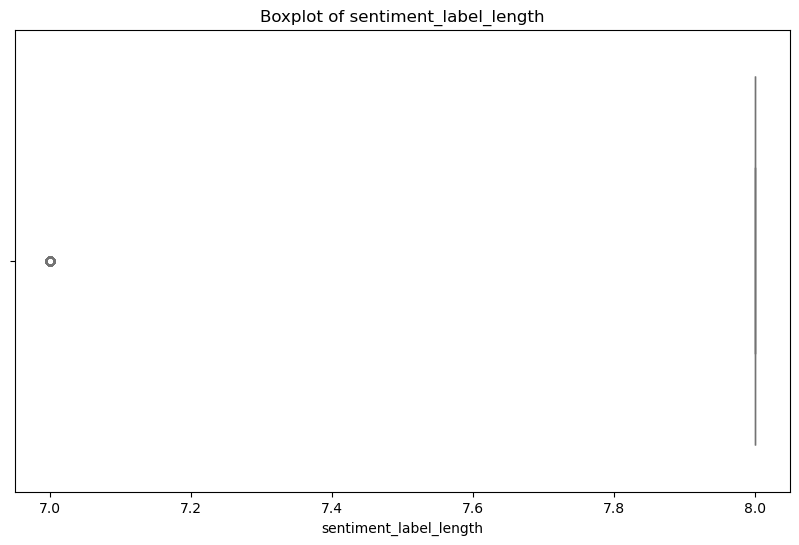

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column and plot a boxplot
for col in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Filter out rows with missing values for the current column
    filtered_data = data[col].dropna()

    # Plot the boxplot for the current column
    sns.boxplot(x=filtered_data, color='lightgreen')

    plt.title(f'Boxplot of {col}')
    plt.show()


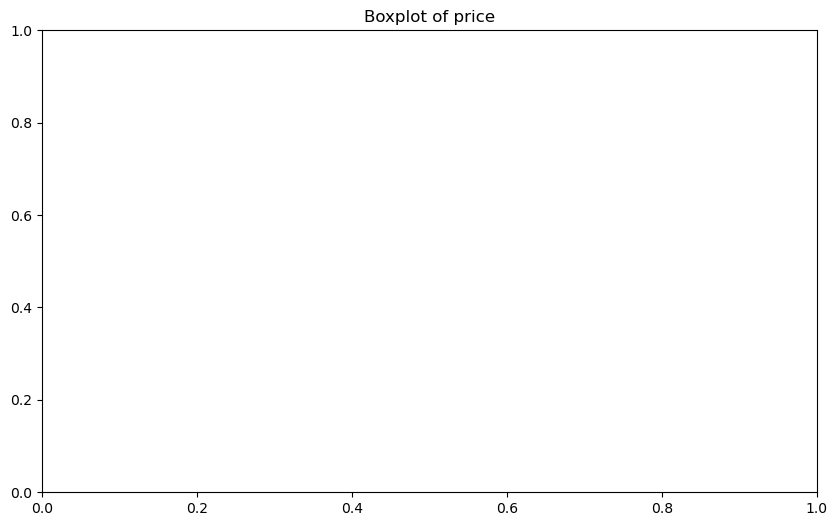

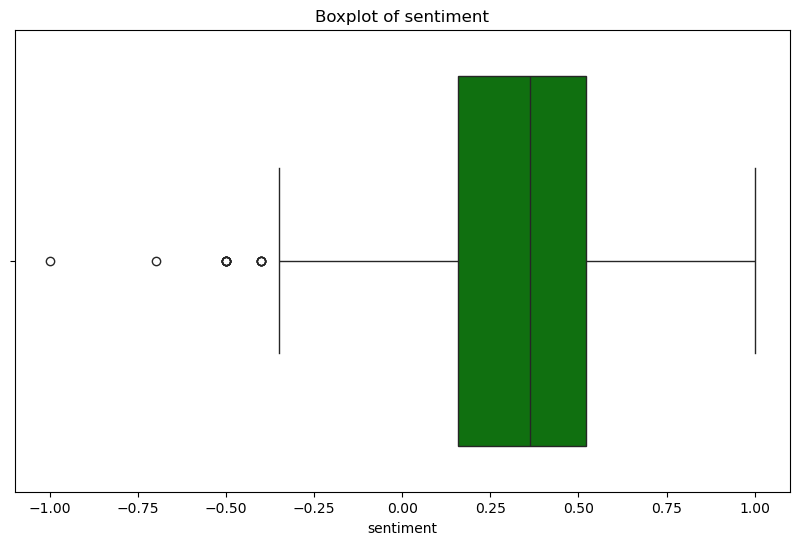

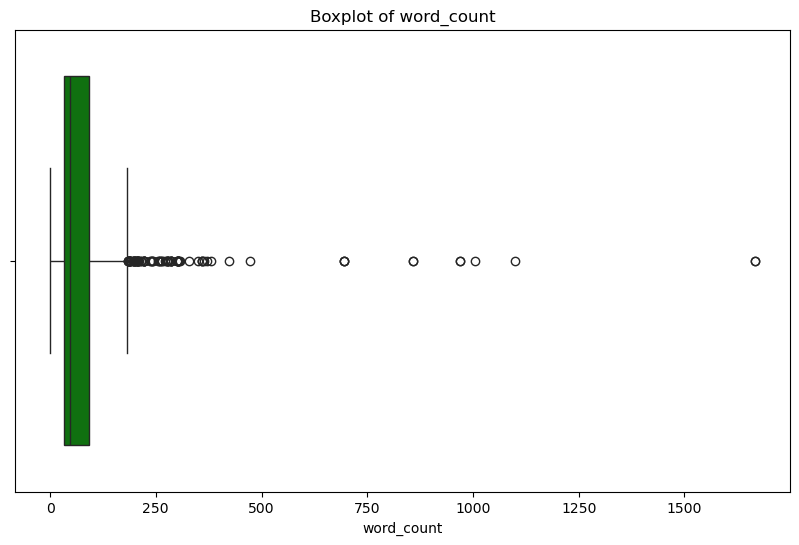

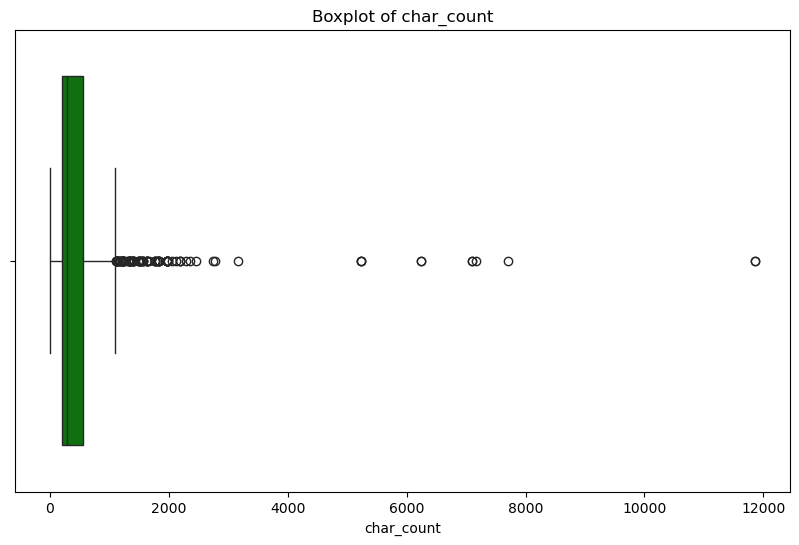

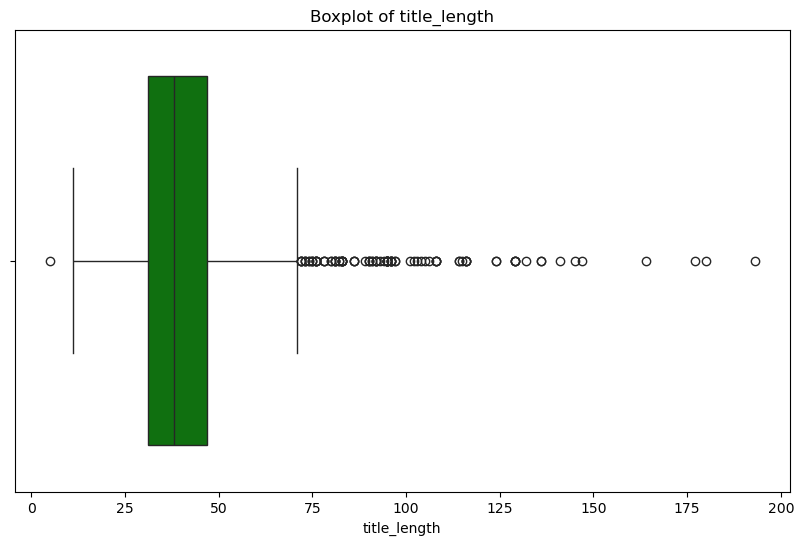

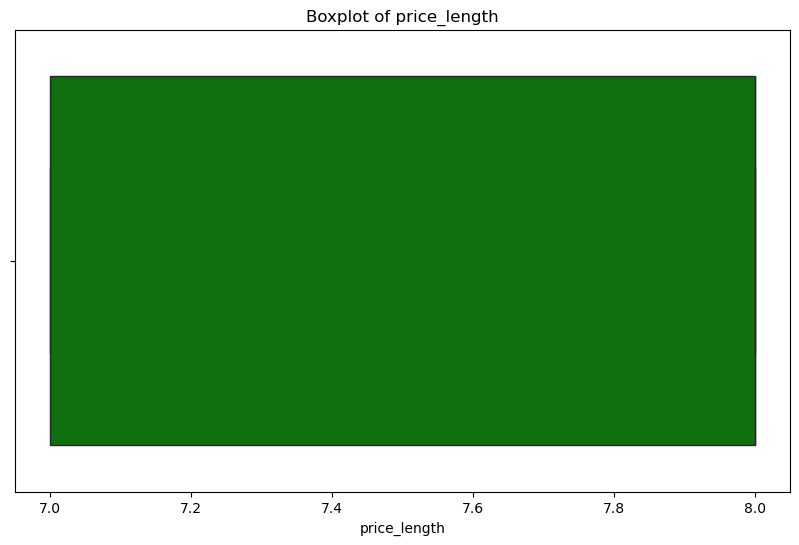

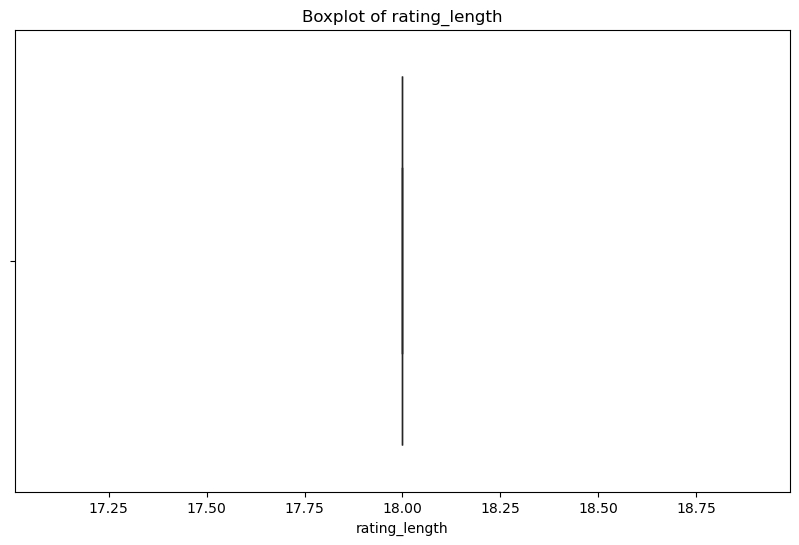

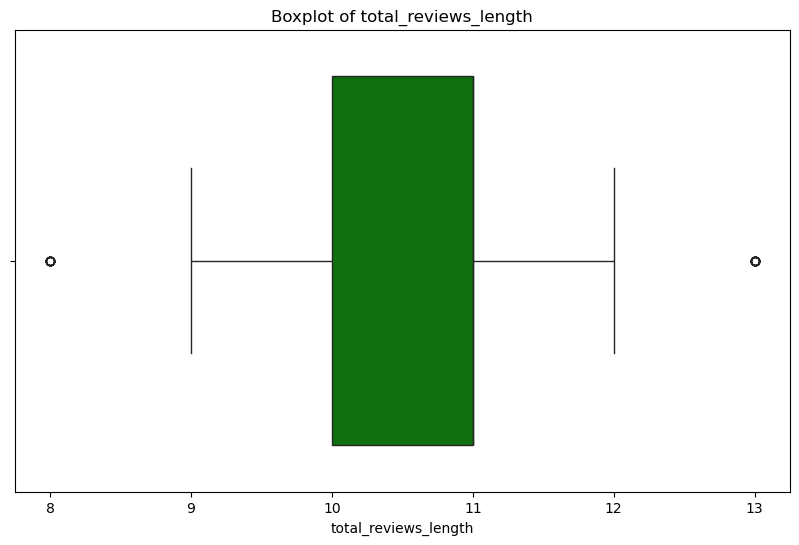

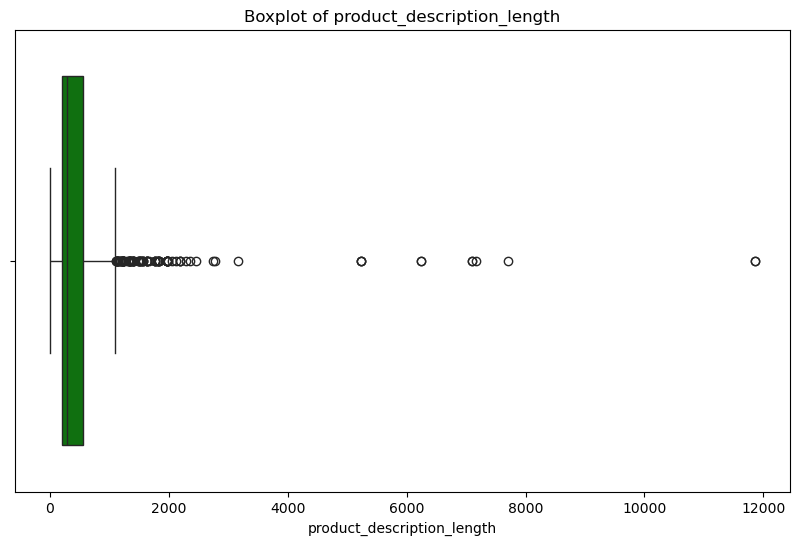

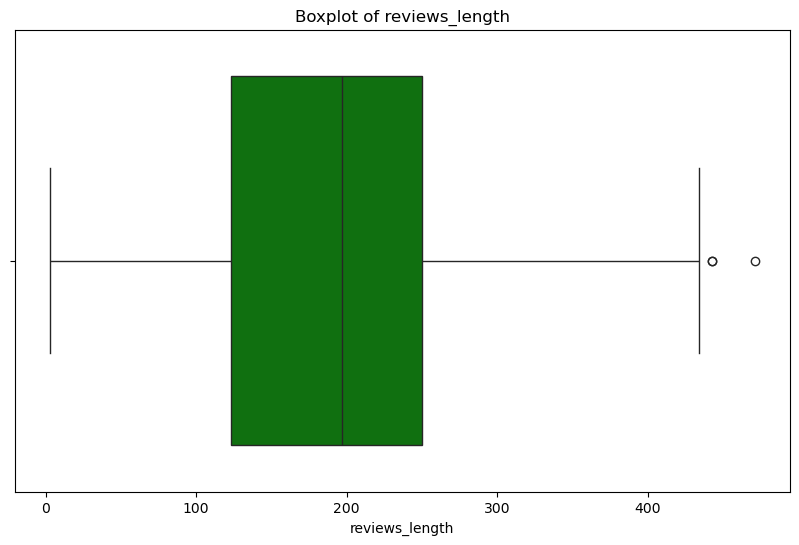

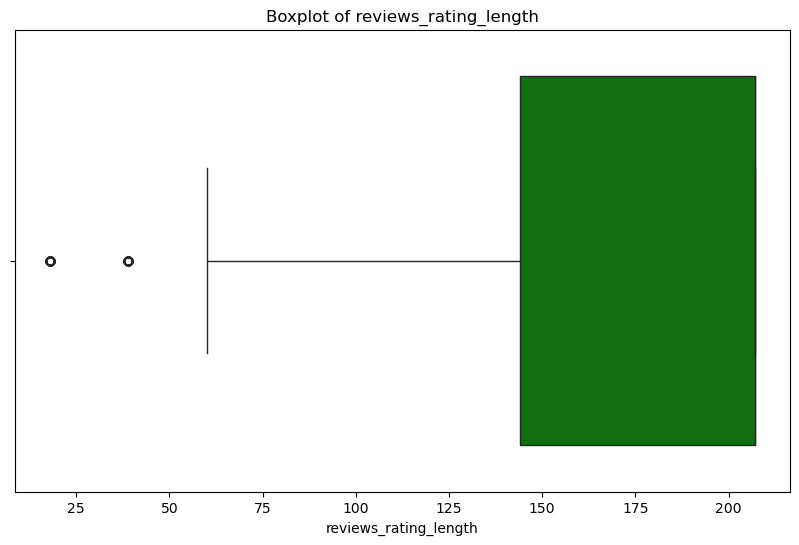

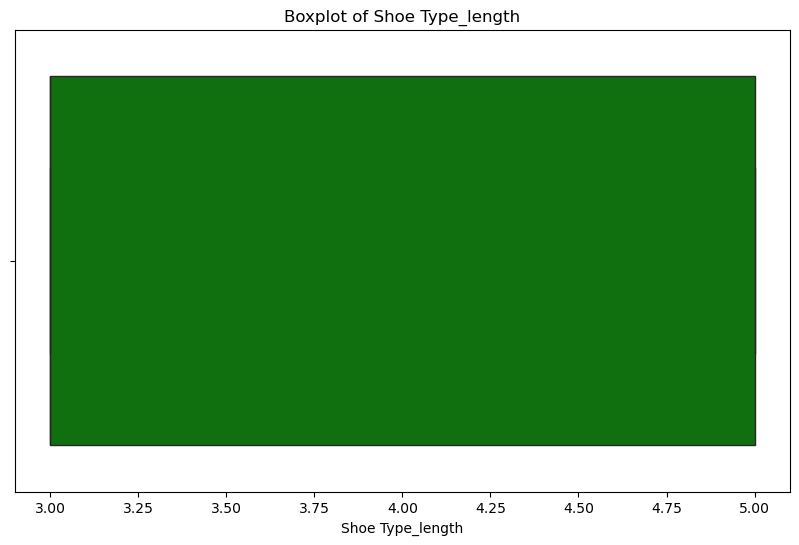

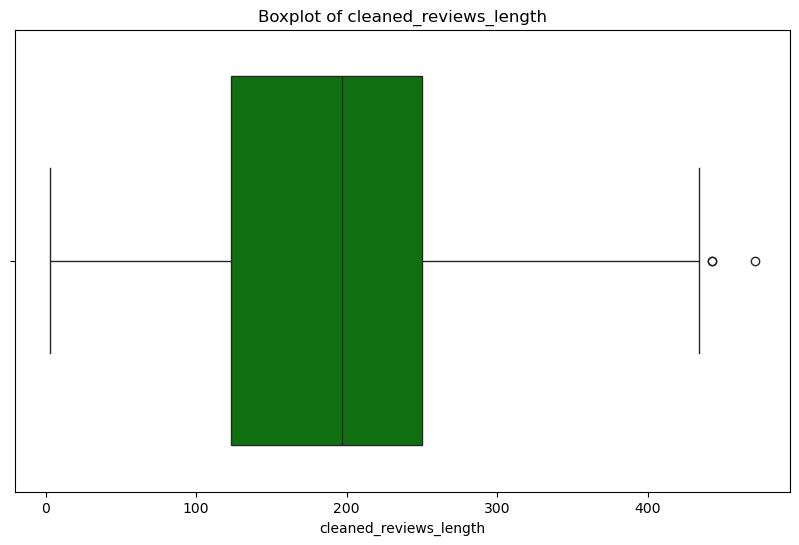

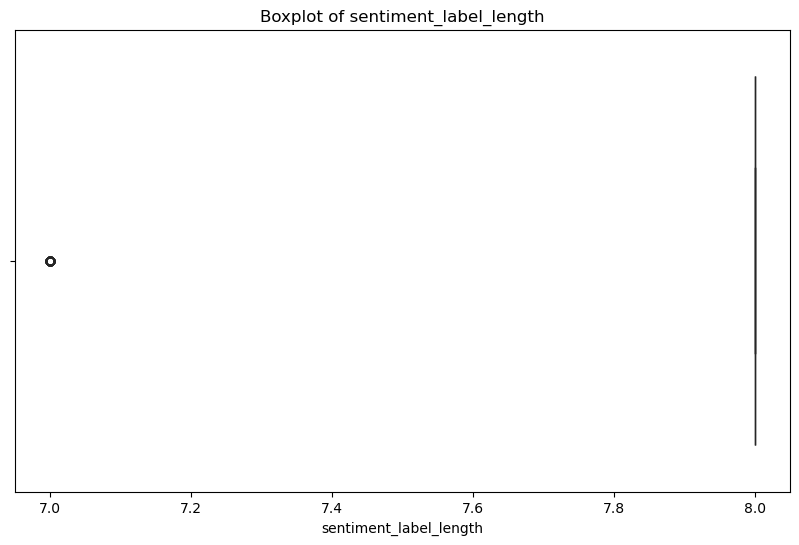

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each categorical column and plot a boxplot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Filter out rows with missing values for the current column
    filtered_data = data[col].dropna()

    # Plot the boxplot for the current column
    sns.boxplot(x=filtered_data, color='green')

    plt.title(f'Boxplot of {col}')
    plt.show()

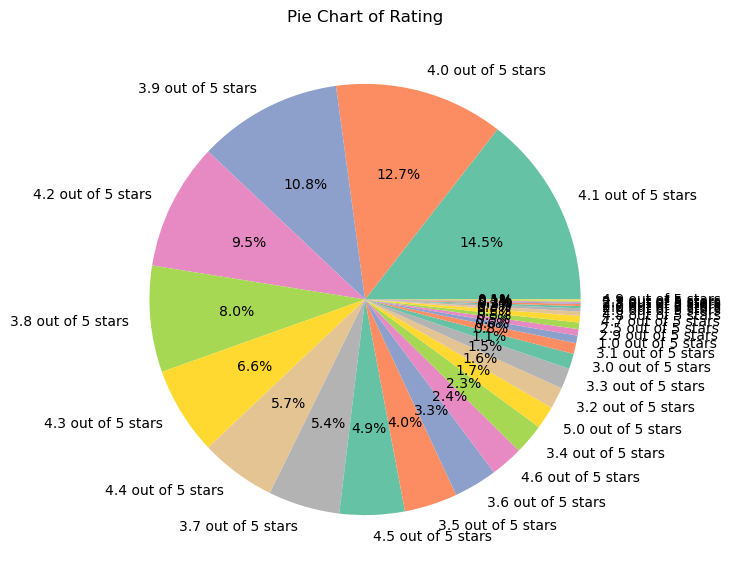

In [31]:
# Pie chart for rating
plt.figure(figsize=(7,7))
data['rating'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Pie Chart of Rating')
plt.ylabel('')  # Removes the label for the Y axis
plt.show()

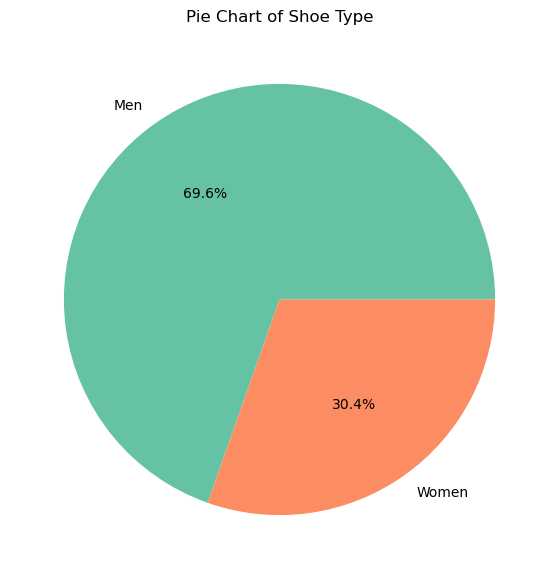

In [32]:
# Pie chart for shoe_type
plt.figure(figsize=(7,7))
data['Shoe Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Pie Chart of Shoe Type')
plt.ylabel('')  # Removes the label for the Y axis
plt.show()

C:\Users\devika\AppData\Local\Temp\ipykernel_508\1489625750.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=shoe_type_column, data=data, palette='Set2')


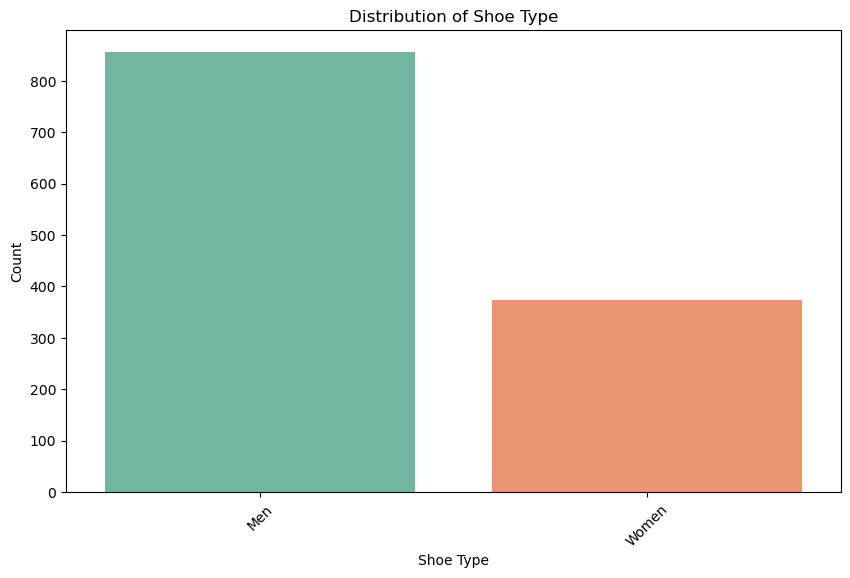

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the column name for shoe type is 'Shoe_Type'
shoe_type_column = 'Shoe Type'

plt.figure(figsize=(10, 6))
sns.countplot(x=shoe_type_column, data=data, palette='Set2')
plt.title(f'Distribution of {shoe_type_column}')
plt.xticks(rotation=45)
plt.xlabel('Shoe Type')
plt.ylabel('Count')
plt.show()

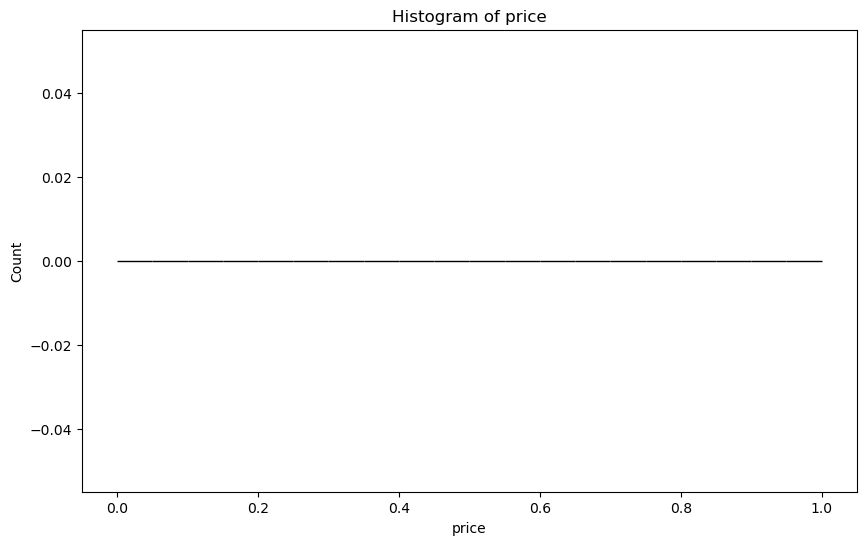

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'column_name' with the actual column you want to visualize
column_name = 'price'  # Example column, replace with your column

plt.figure(figsize=(10, 6))
sns.histplot(data[column_name], kde=True, bins=20)
plt.title(f'Histogram of {column_name}')
plt.show()

C:\Users\devika\AppData\Local\Temp\ipykernel_508\3700530604.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='rating', y='title', data=top_n, palette='viridis')


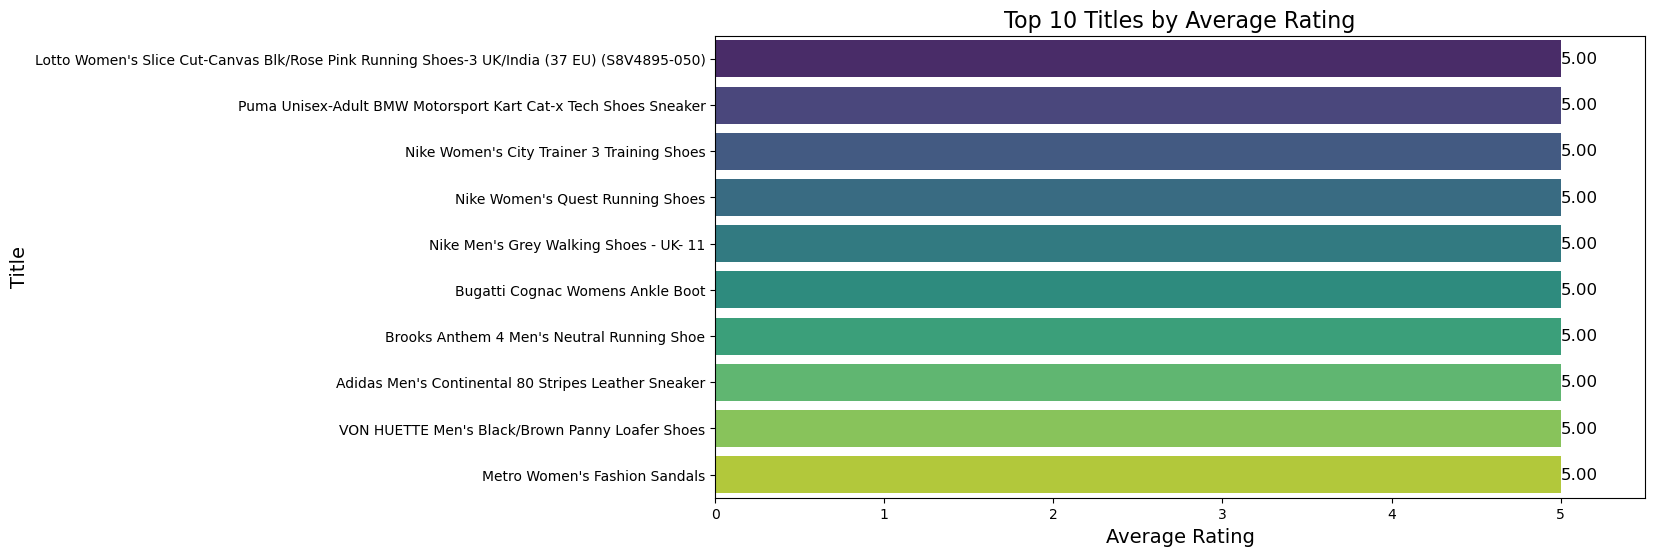

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to convert rating strings to numeric values
def extract_rating(rating_str):
    if isinstance(rating_str, str):  # Ensure we're processing a string
        # Use regex to find the first number in the string
        match = re.search(r'(\d+(\.\d+)?)', rating_str)
        return float(match.group(1)) if match else None
    elif isinstance(rating_str, (float, int)):  # If it's already a float or int, return it directly
        return float(rating_str)
    else:
        return None  # Handle any other types gracefully

# Apply the function to the 'rating' column
data['rating'] = data['rating'].apply(extract_rating)

# Drop any rows where the rating is NaN (if any)
data = data.dropna(subset=['rating'])

# Ensure the 'rating' column is of type float
data['rating'] = data['rating'].astype(float)

# Group by 'title' and calculate the average rating
average_ratings = data.groupby('title')['rating'].mean().reset_index()

# Sort values by rating for better visualization
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

# Function to visualize top N titles by average rating
def plot_top_n_titles(data, n=10):
    # Create a bar plot for the top N titles
    plt.figure(figsize=(12, 6))
    top_n = data.head(n)
    bar_plot = sns.barplot(x='rating', y='title', data=top_n, palette='viridis')

    # Add title and labels
    plt.title(f'Top {n} Titles by Average Rating', fontsize=16)
    plt.xlabel('Average Rating', fontsize=14)
    plt.ylabel('Title', fontsize=14)

    # Add annotations to the bars
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_width():.2f}',
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='left', va='center',
                          fontsize=12, color='black')

    plt.xlim(0, top_n['rating'].max() + 0.5)  # Extend x-axis limit for annotations
    plt.show()

# Call the function to visualize top 10 titles
plot_top_n_titles(average_ratings, n=10)


C:\Users\devika\AppData\Local\Temp\ipykernel_508\2417095207.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='title', x='rating', data=data_five_rated, palette='viridis')


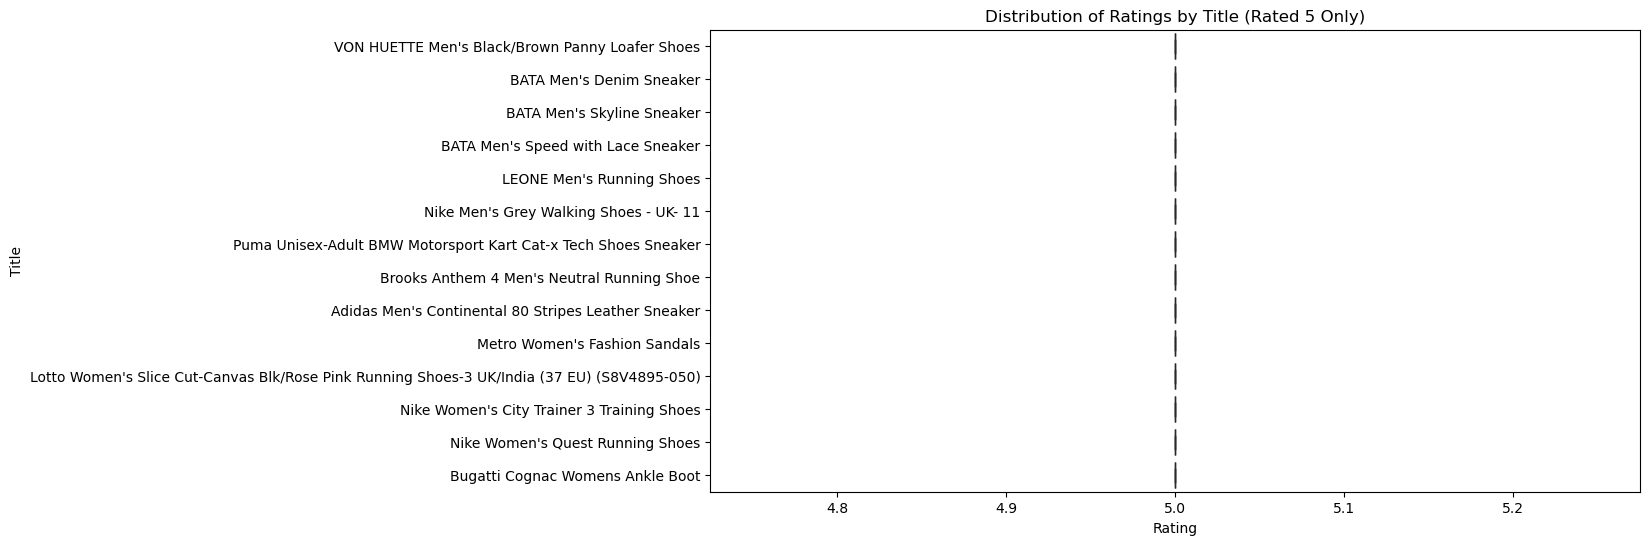

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to convert rating strings to numeric values
def extract_rating(rating_str):
    if isinstance(rating_str, str):  # Ensure we're processing a string
        # Use regex to find the first number in the string
        match = re.search(r'(\d+(\.\d+)?)', rating_str)
        return float(match.group(1)) if match else None
    elif isinstance(rating_str, (float, int)):  # If it's already a float or int, return it directly
        return float(rating_str)
    else:
        return None  # Handle any other types gracefully

# Apply the function to the 'rating' column
data['rating'] = data['rating'].apply(extract_rating)

# Drop any rows where the rating is NaN (if any)
data = data.dropna(subset=['rating'])

# Ensure the 'rating' column is of type float
data['rating'] = data['rating'].astype(float)

# Group by 'title' and calculate the average rating
average_ratings = data.groupby('title')['rating'].mean().reset_index()

# Sort values by rating for better visualization
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

# Get the top 5 rated titles
top_5_titles = average_ratings.head(5)

# Filter the original data for these titles
top_5_data = data[data['title'].isin(top_5_titles['title'])]

# Create a boxplot for the distribution of ratings by title for the top 5 titles
# Filter the DataFrame for titles with a rating of 5
data_five_rated = data[data['rating'] == 5]

# Box Plot of Ratings by Title for titles rated 5
plt.figure(figsize=(12, 6))
sns.boxplot(y='title', x='rating', data=data_five_rated, palette='viridis')
plt.title('Distribution of Ratings by Title (Rated 5 Only)')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()


C:\Users\devika\AppData\Local\Temp\ipykernel_508\3790472734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='title', x='rating', data=data_five_rated, palette='viridis')


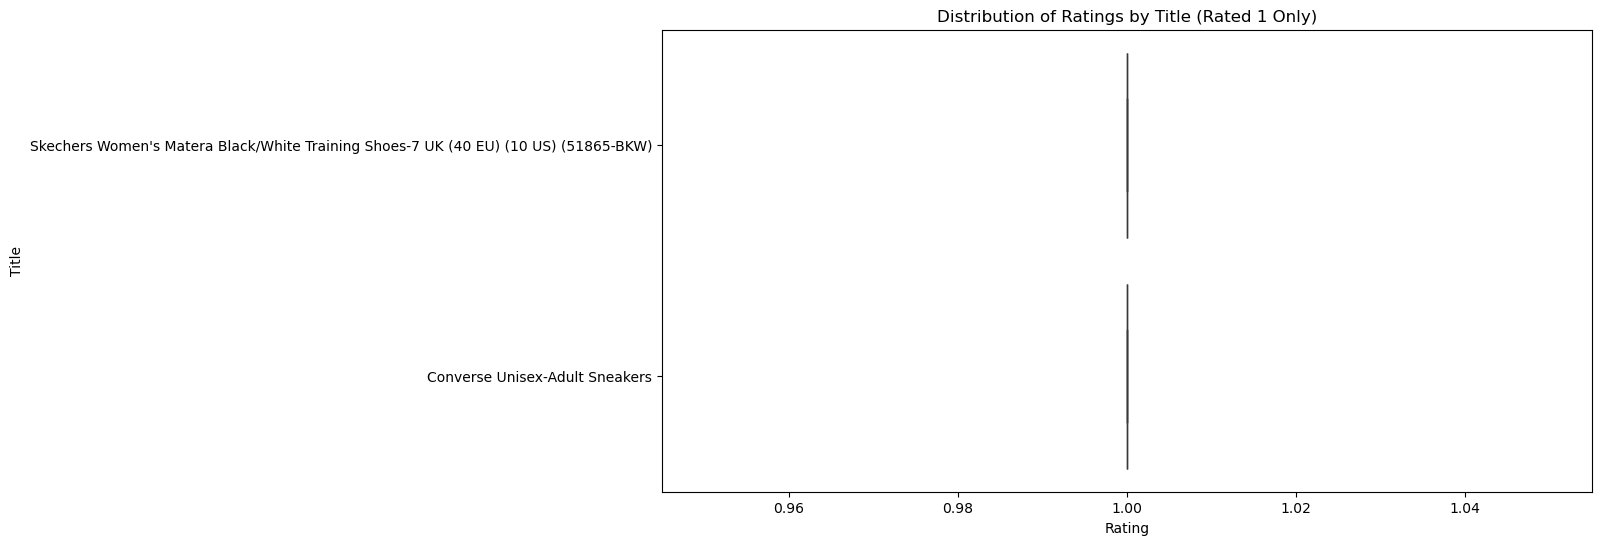

In [37]:
# Filter the DataFrame for titles with a rating of 1
data_five_rated = data[data['rating'] == 1]

# Box Plot of Ratings by Title for titles rated 1
plt.figure(figsize=(12, 6))
sns.boxplot(y='title', x='rating', data=data_five_rated, palette='viridis')
plt.title('Distribution of Ratings by Title (Rated 1 Only)')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()

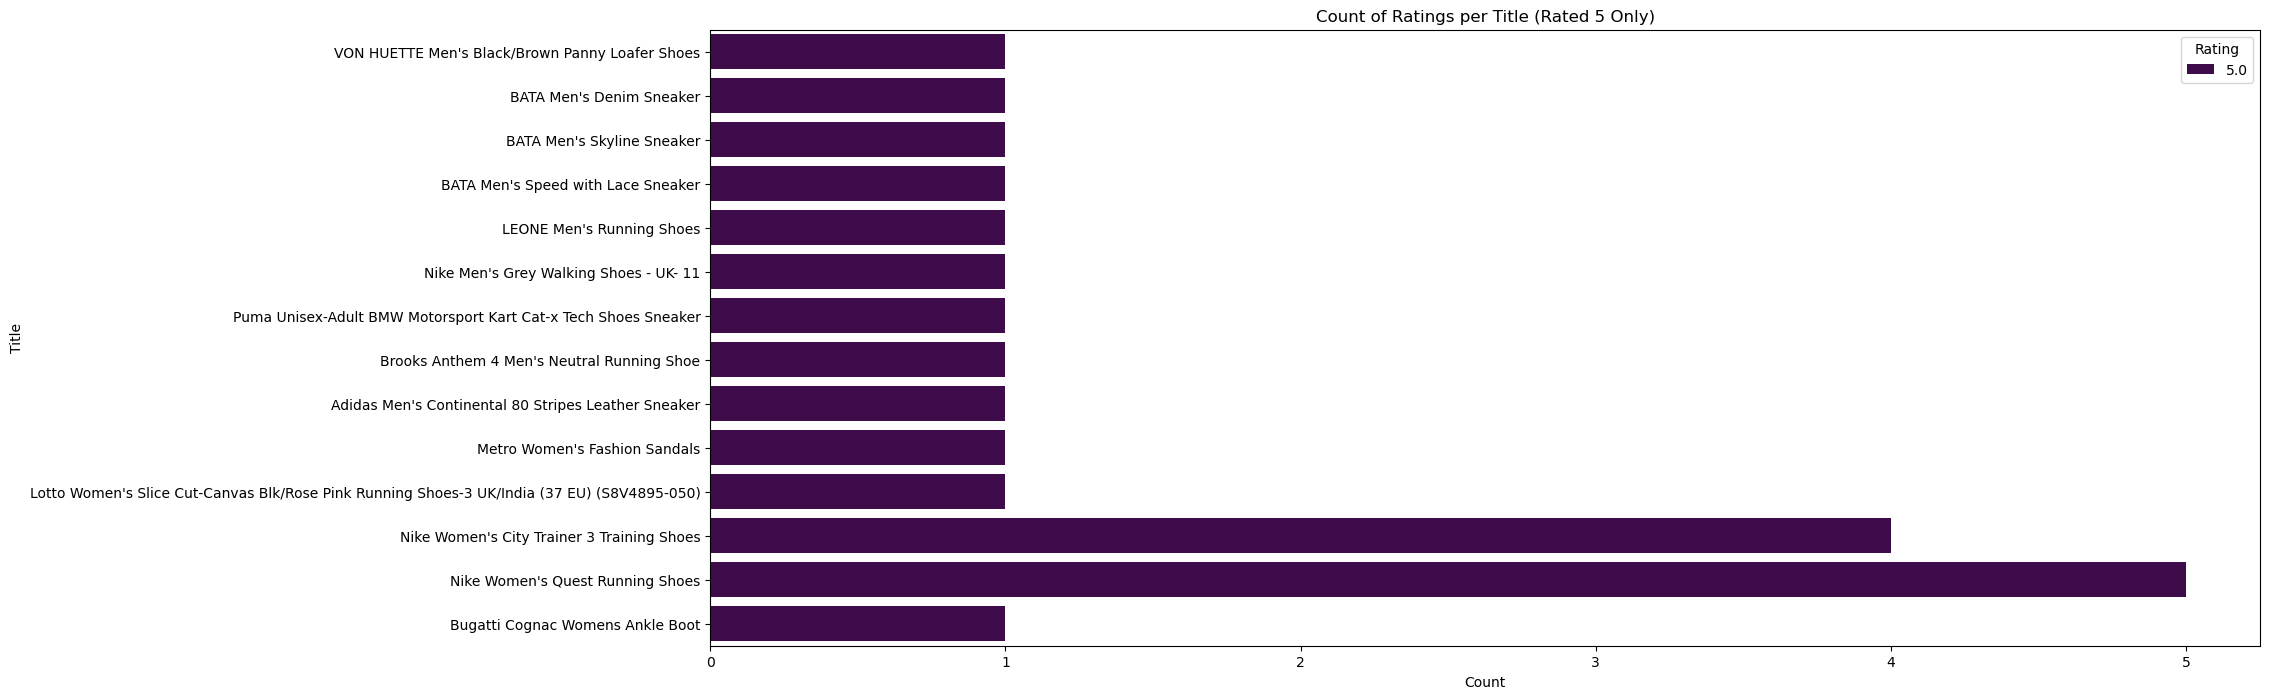

In [38]:
# Filter the DataFrame for titles with a rating of 5
data_five_rated = data[data['rating'] == 5]

# Count Plot of Ratings per Title for titles rated 5
plt.figure(figsize=(20, 8))
sns.countplot(y='title', hue='rating', data=data_five_rated, palette='viridis')
plt.title('Count of Ratings per Title (Rated 5 Only)')
plt.xlabel('Count')
plt.ylabel('Title')
plt.legend(title='Rating')
plt.show()


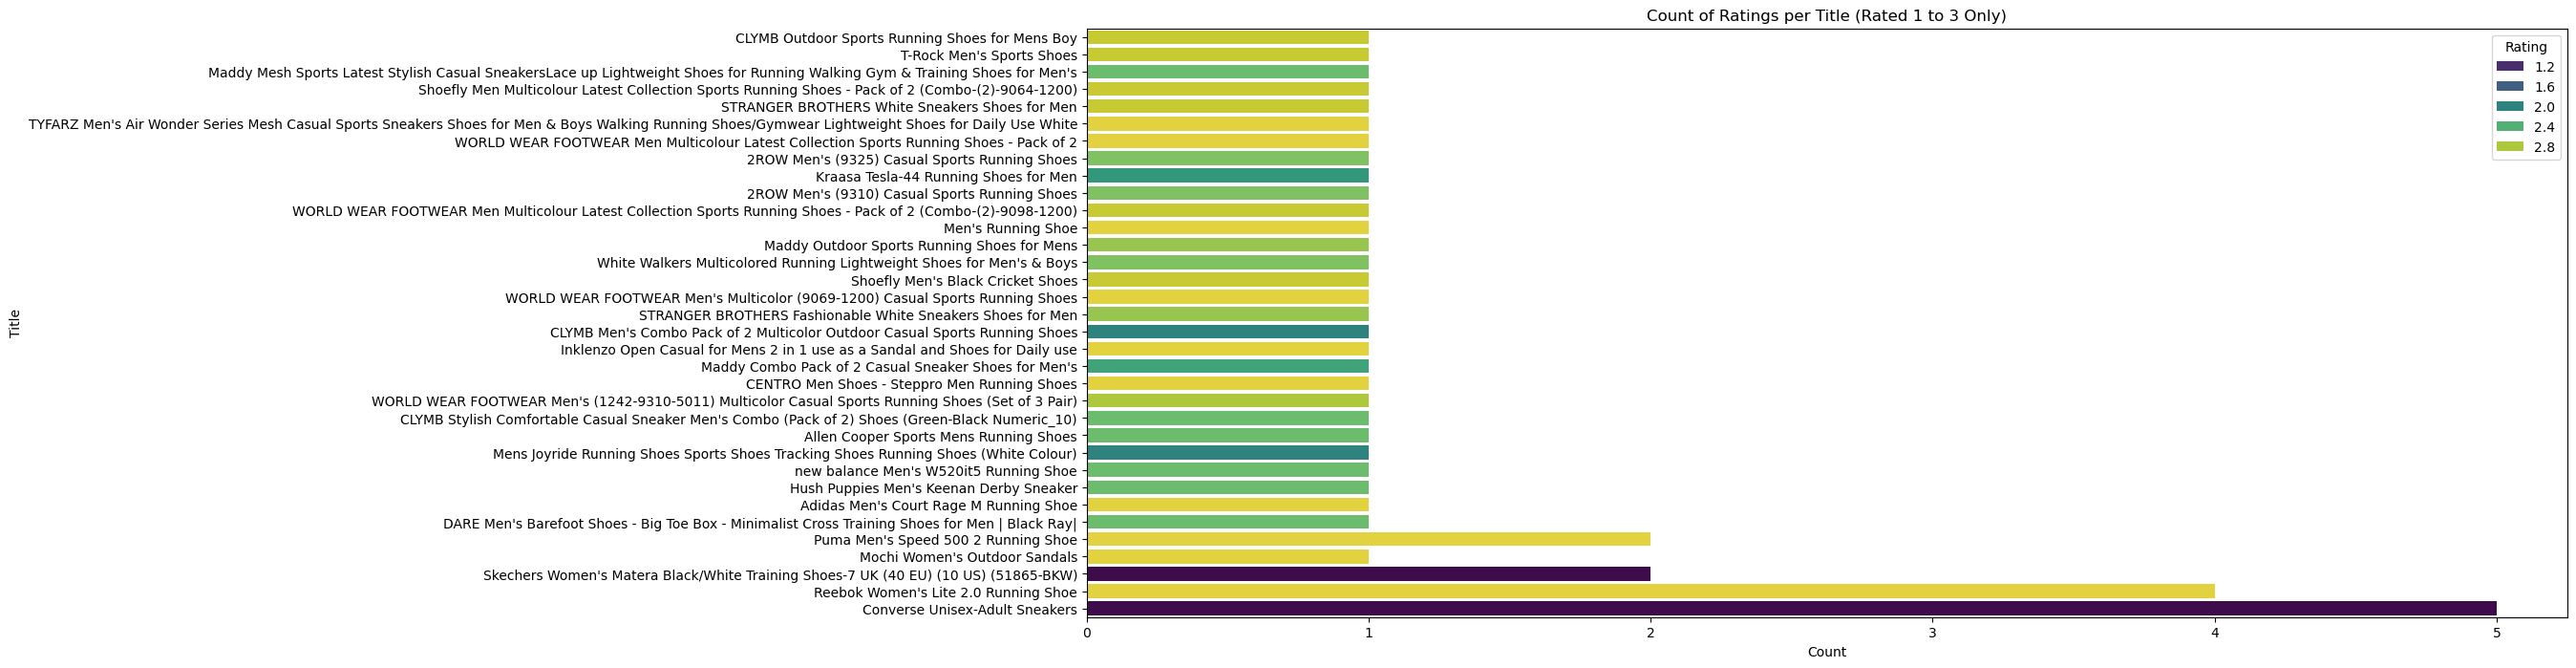

In [39]:
# Filter the DataFrame for titles with ratings between 1 and 3
data_one_two_rated = data[(data['rating'] >= 1) & (data['rating'] <= 3)]

# Count Plot of Ratings per Title for titles rated 1 to 2
plt.figure(figsize=(20, 8))
sns.countplot(y='title', hue='rating', data=data_one_two_rated, palette='viridis')
plt.title('Count of Ratings per Title (Rated 1 to 3 Only)')
plt.xlabel('Count')
plt.ylabel('Title')
plt.legend(title='Rating')
plt.show()

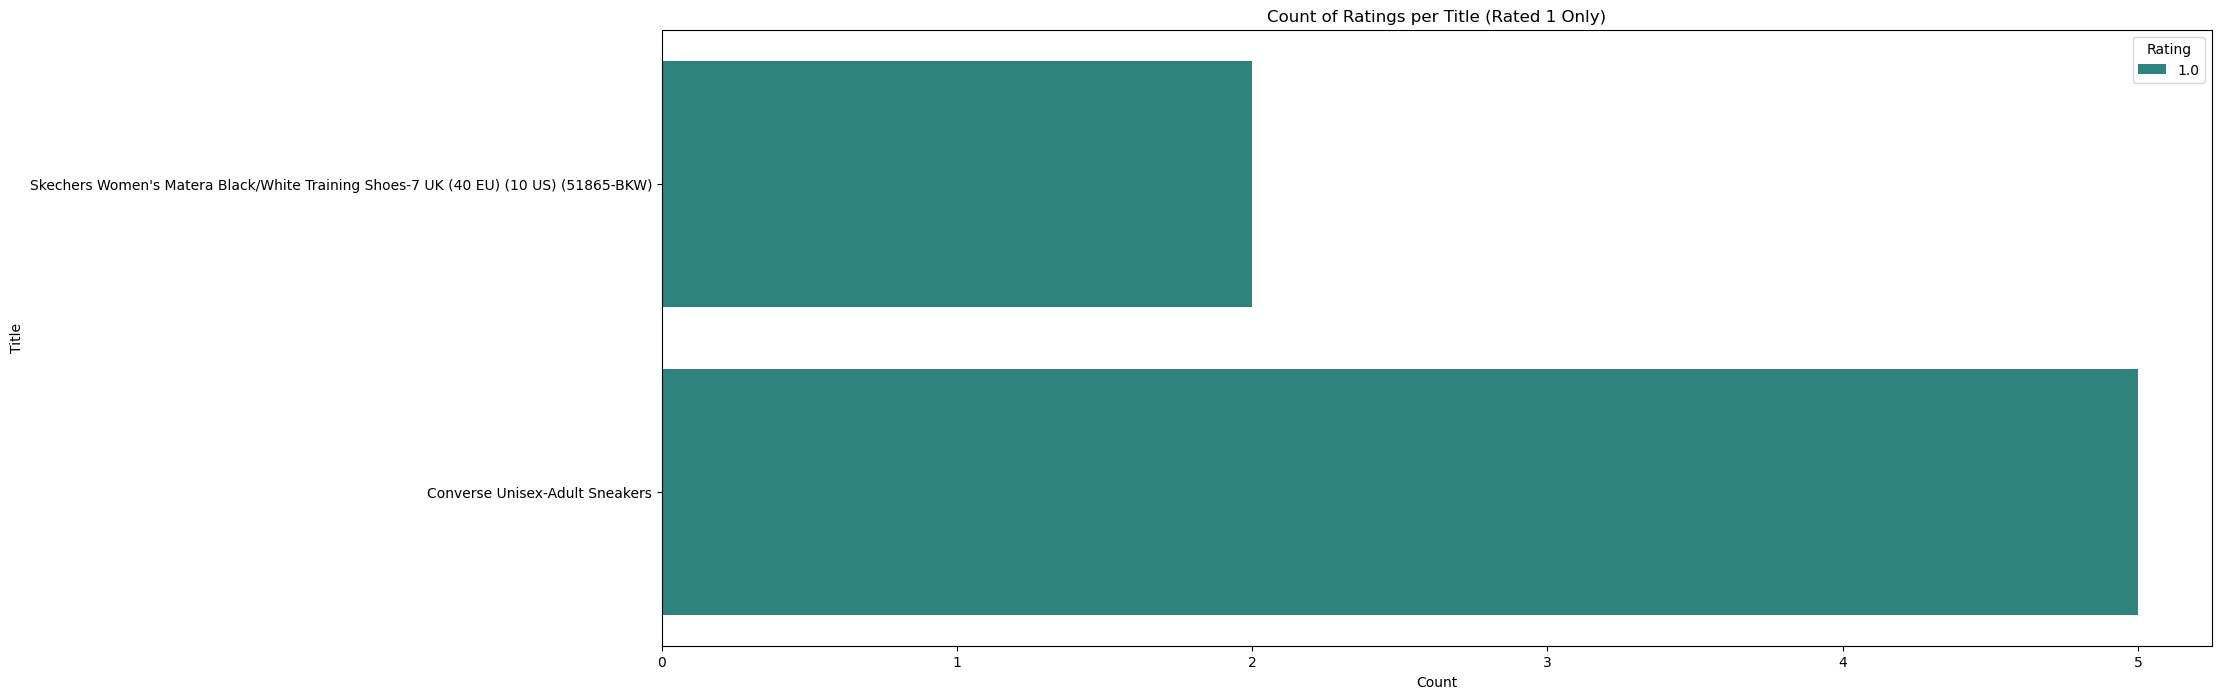

In [40]:
# Filter the DataFrame for titles with a rating of 1
data_one_rated = data[data['rating'] == 1]

# Count Plot of Ratings per Title for titles rated 1
plt.figure(figsize=(20, 8))
sns.countplot(y='title', hue='rating', data=data_one_rated, palette='viridis')
plt.title('Count of Ratings per Title (Rated 1 Only)')
plt.xlabel('Count')
plt.ylabel('Title')
plt.legend(title='Rating')
plt.show()

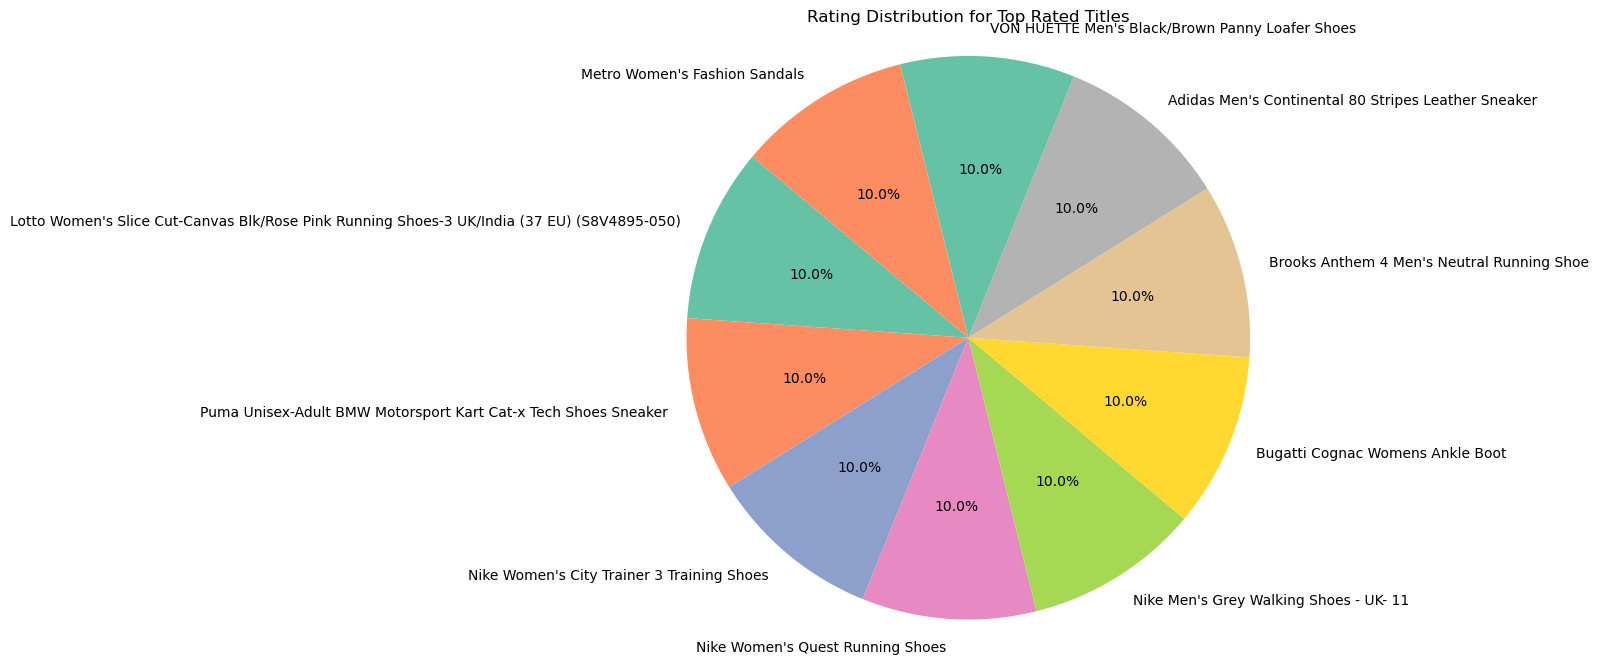

In [41]:
# Pie Chart of Rating Distribution for Top Titles
top_titles = average_ratings.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_titles['rating'], labels=top_titles['title'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Rating Distribution for Top Rated Titles')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [42]:
from collections import Counter
import re

# Tokenize the text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Combine and tokenize all text in a column
tokenized_words = tokenize(' '.join(data['title'].dropna().astype(str)))

# Get the frequency of each word
word_freq = Counter(tokenized_words)

# Display the most common words
word_freq.most_common(10)

[('s', 917),
 ('men', 847),
 ('shoes', 734),
 ('running', 538),
 ('women', 336),
 ('shoe', 234),
 ('sneakers', 133),
 ('formal', 127),
 ('adidas', 110),
 ('for', 108)]

C:\Users\devika\AppData\Local\Temp\ipykernel_508\3184971013.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="Blues_d")


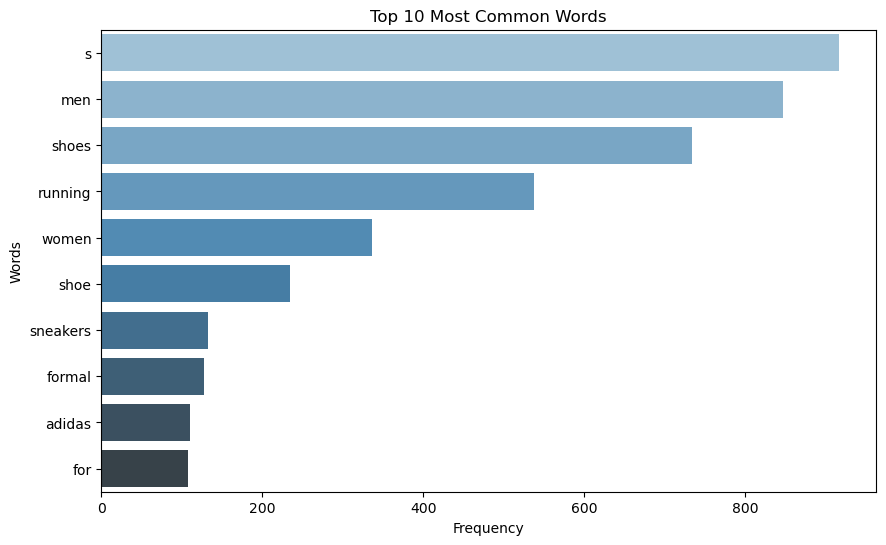

In [43]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize the text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Combine and tokenize all text in a column
tokenized_words = tokenize(' '.join(data['title'].dropna().astype(str)))

# Get the frequency of each word
word_freq = Counter(tokenized_words)

# Get the most common 10 words
most_common_words = word_freq.most_common(10)

# Split the words and their frequencies into separate lists
words, frequencies = zip(*most_common_words)

# Create a bar plot for the top 10 most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, palette="Blues_d")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
plt.show()


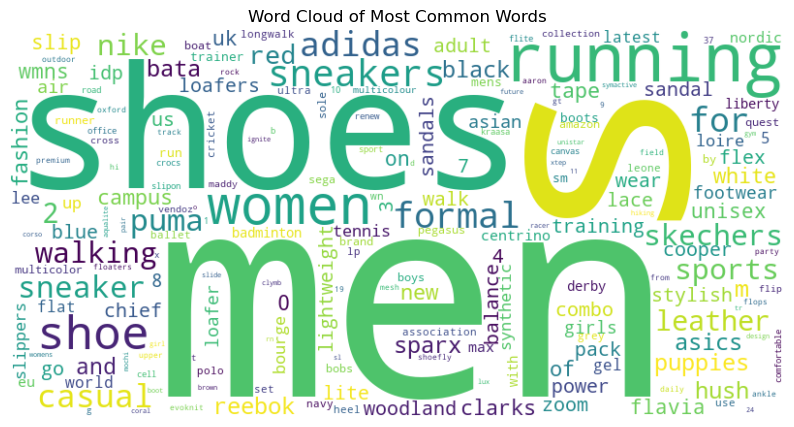

In [44]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


In [45]:
from collections import Counter
import re

# Tokenize the text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Combine and tokenize all text in a column
tokenized_words = tokenize(' '.join(data['product_description'].dropna().astype(str)))

# Get the frequency of each word
word_freq = Counter(tokenized_words)

# Display the most common words
word_freq.most_common(10)


[('the', 3443),
 ('and', 3334),
 ('of', 1927),
 ('a', 1717),
 ('for', 1684),
 ('with', 1677),
 ('to', 1672),
 ('in', 1389),
 ('shoes', 1323),
 ('is', 999)]

C:\Users\devika\AppData\Local\Temp\ipykernel_508\158237369.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="Blues_d")


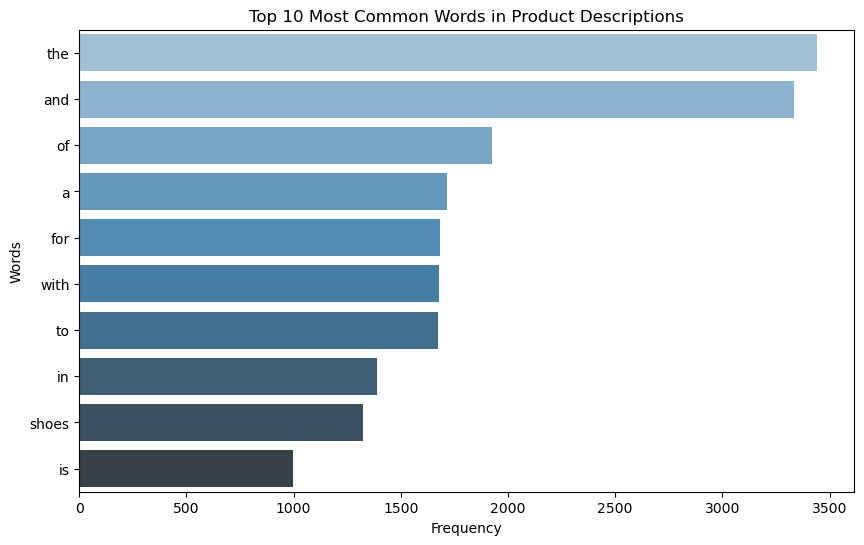

In [46]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize the text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Combine and tokenize all text in the 'product_description' column
tokenized_words = tokenize(' '.join(data['product_description'].dropna().astype(str)))

# Get the frequency of each word
word_freq = Counter(tokenized_words)

# Get the top 10 most common words
most_common_words = word_freq.most_common(10)

# Split the words and their frequencies into separate lists
words, frequencies = zip(*most_common_words)

# Create a bar plot for the top 10 most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, palette="Blues_d")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words in Product Descriptions')
plt.show()


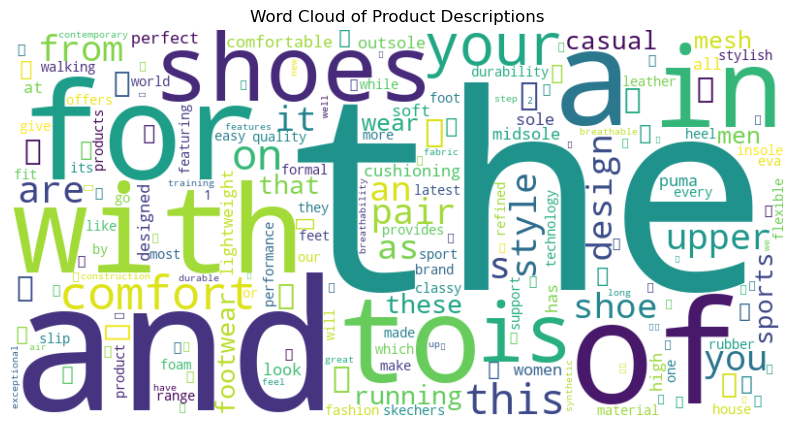

In [47]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.show()


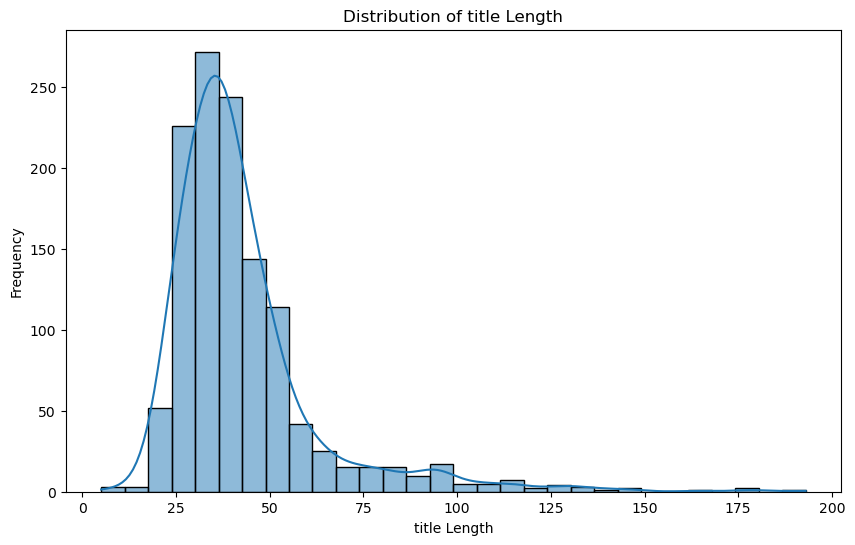

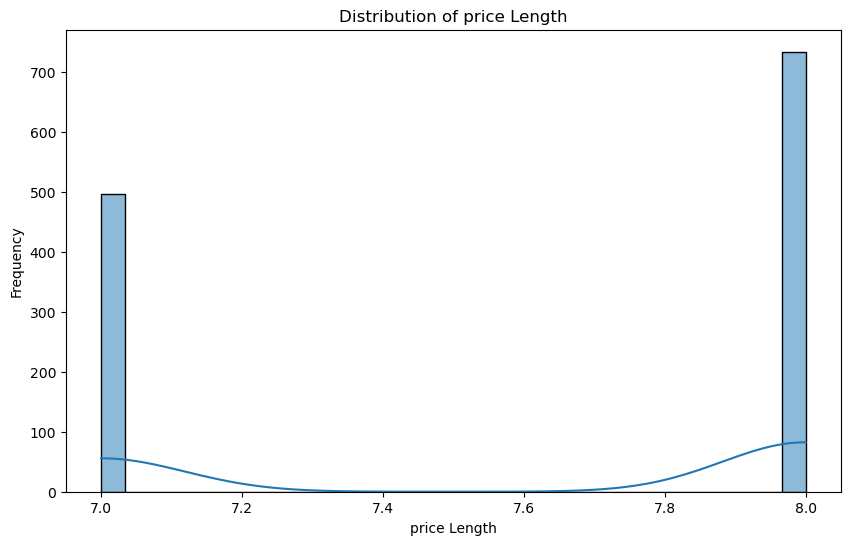

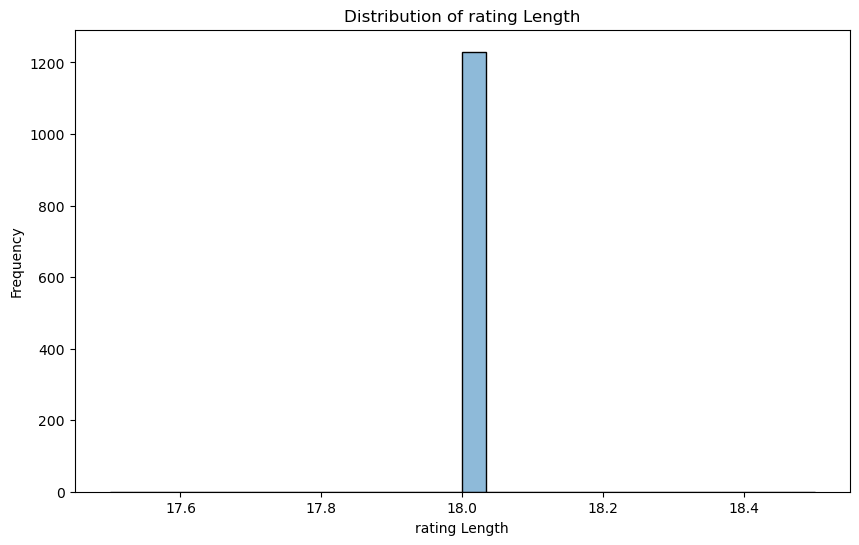

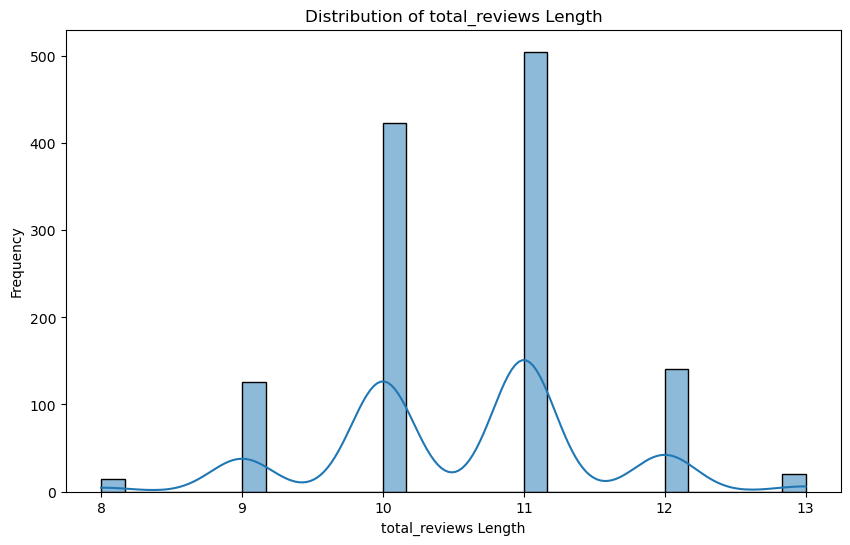

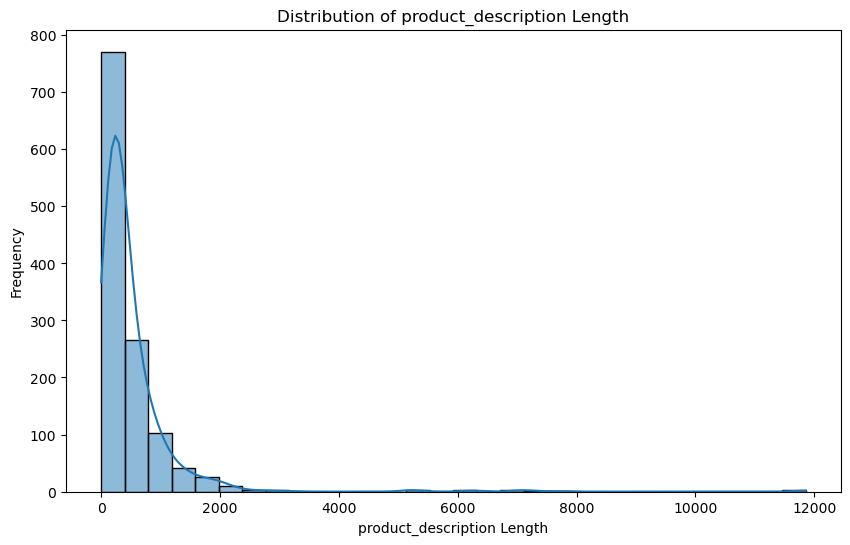

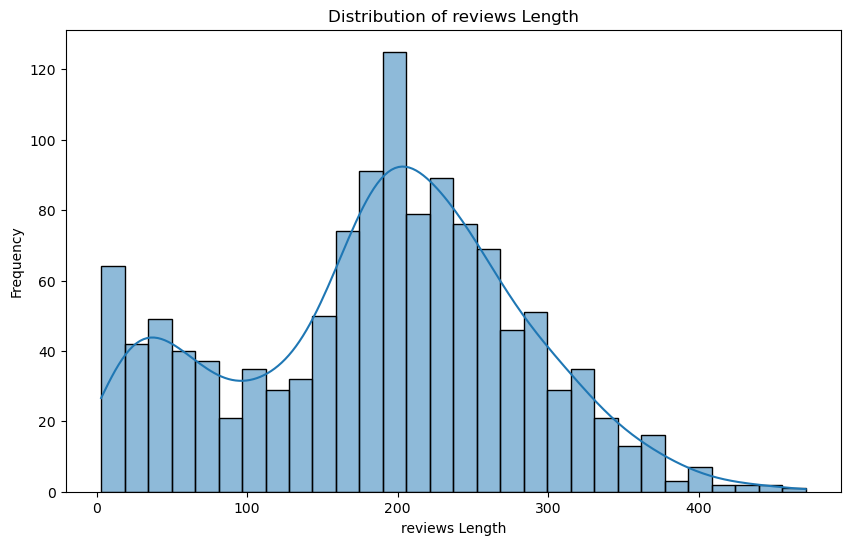

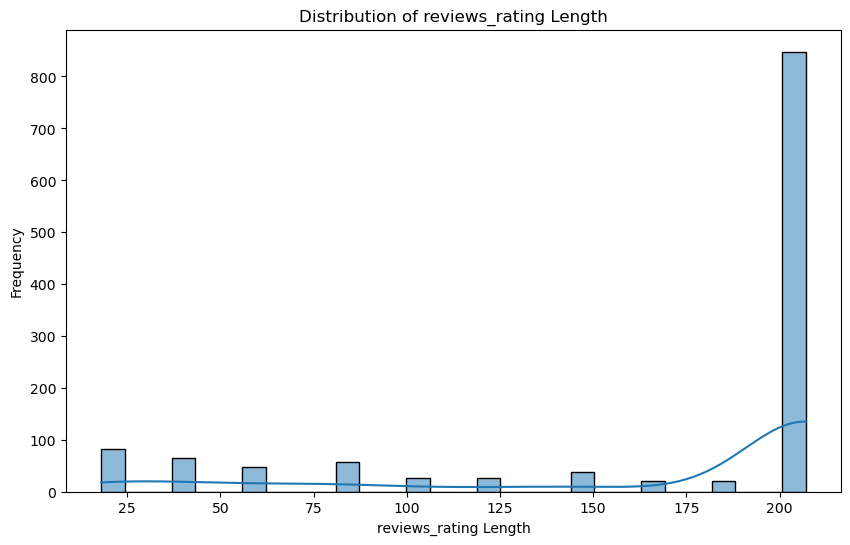

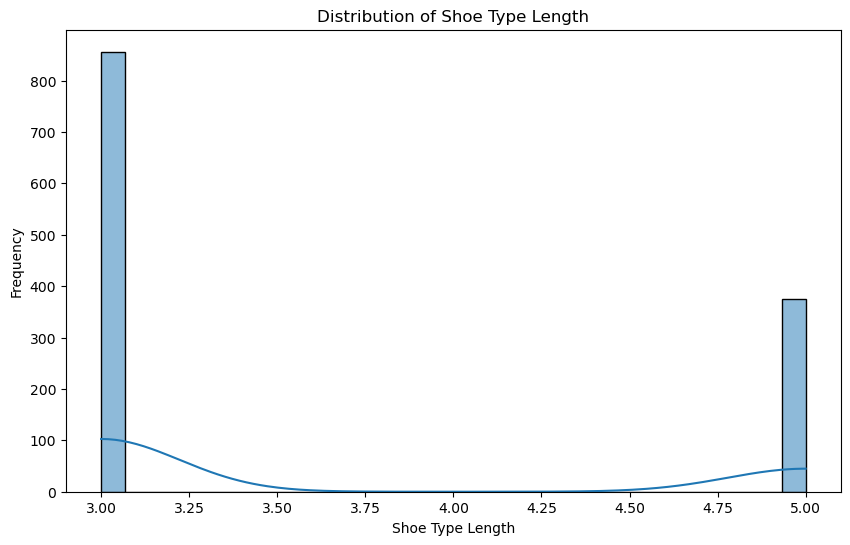

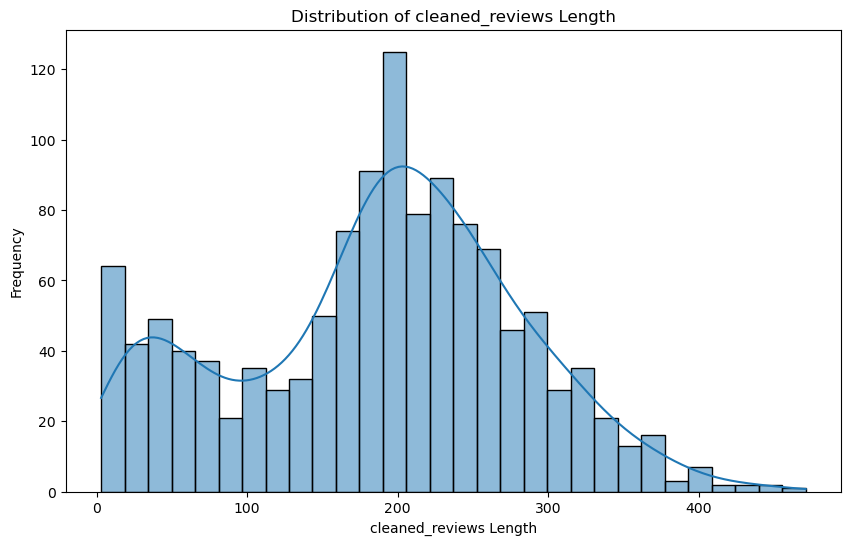

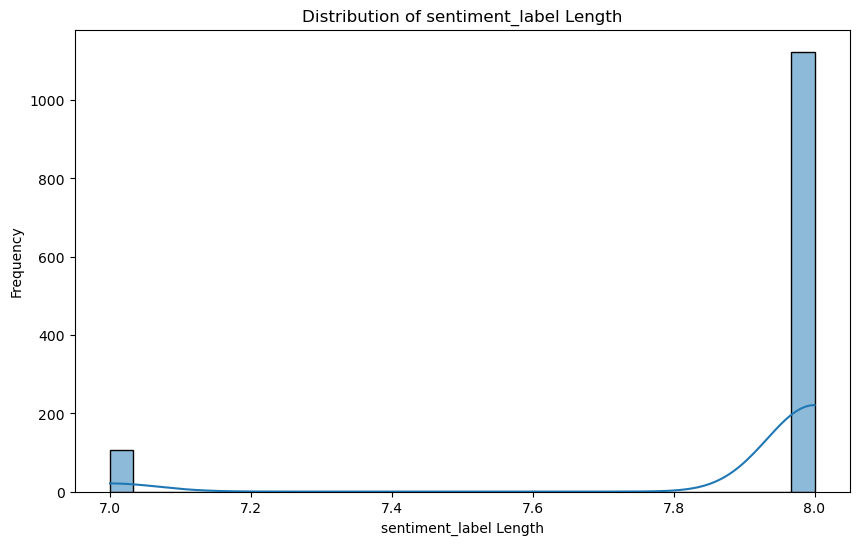

In [48]:
import seaborn as sns

# Plot the distribution of text lengths
for col in text_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[f'{col}_length'], kde=True, bins=30)
    plt.title(f'Distribution of {col} Length')
    plt.xlabel(f'{col} Length')
    plt.ylabel('Frequency')
    plt.show()


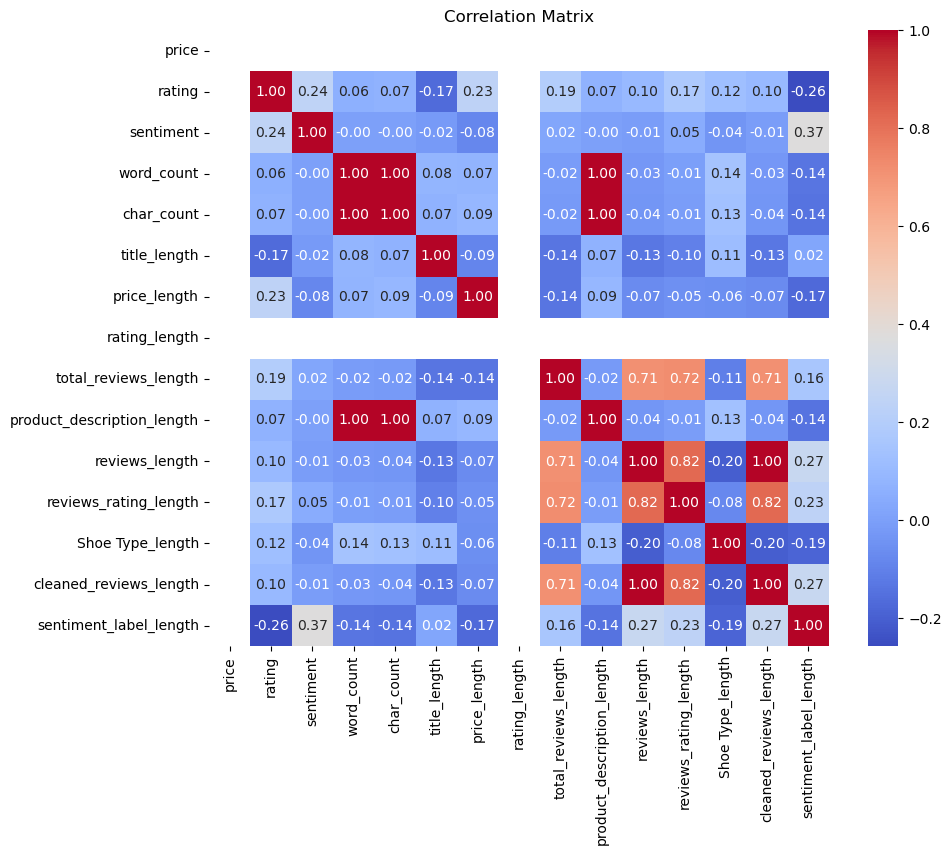

In [49]:
# Calculate the correlation matrix for numerical columns
# Check for numeric columns only
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
if len(numeric_columns) > 0:  # Check if there are any numeric columns
    correlation_matrix = data[numeric_columns].corr()

    # Plot the correlation matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns available for correlation.")


In [50]:
# Get the unique values and their counts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for title:
title
Flavia Women Running Shoes                                                             13
Flavia Women's Running Shoes                                                           10
Sparx Men's Running Shoes                                                               8
Adidas Men Running Shoes                                                                8
Clarks Men's Formal Shoes                                                               8
                                                                                       ..
Mens Joyride Running Shoes Sports Shoes Tracking Shoes Running Shoes (White Colour)     1
Hush Puppies Men Tyler Formal Shoes                                                     1
Red Tape mens Outdoor Boots                                                             1
US Polo Association Men's Panal Sneakers                                                1
ASICS Men's Gel-Contend 5b Running Shoes                              

In [51]:
import pandas as pd

# Convert column to numeric, forcing errors to NaN
data['total_reviews'] = pd.to_numeric(data['total_reviews'], errors='coerce')

# Drop rows where 'total_reviews' is NaN
data_cleaned = data.dropna(subset=['total_reviews'])

def find_outliers_iqr(column):
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]

# Example: Remove outliers detected by IQR for 'total_reviews' column
outliers = find_outliers_iqr('total_reviews')
data_final = data_cleaned[~data_cleaned.index.isin(outliers.index)]

# Check the shape after removing outliers
print(data_final.shape)

(0, 23)


In [52]:
import pandas as pd

# Convert column to numeric, forcing errors to NaN
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Drop rows where 'total_reviews' is NaN
data_cleaned = data.dropna(subset=['price'])

def find_outliers_iqr(column):
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]

# Example: Remove outliers detected by IQR for 'total_reviews' column
outliers = find_outliers_iqr('price')
data_final = data_cleaned[~data_cleaned.index.isin(outliers.index)]

# Check the shape after removing outliers
print(data_final.shape)


(0, 23)


In [53]:
# Step 1: Check if 'reviews' column exists in the DataFrame
if 'reviews' in data.columns:
    # Step 2: Create a new column for text length
    data['text_length'] = data['reviews'].apply(lambda x: len(str(x)))  # Ensure reviews are treated as strings
else:
    print("The 'reviews' column does not exist in the DataFrame.")

# Step 3: Descriptive stats for the text length (only if 'text_length' was successfully created)
if 'text_length' in data.columns:
    print(data['text_length'].describe())

# Step 4: Detect outliers using IQR
    Q1 = data['text_length'].quantile(0.25)
    Q3 = data['text_length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data['text_length'] < lower_bound) | (data['text_length'] > upper_bound)]
    print(f'Number of outliers: {len(outliers)}')

count    1230.000000
mean      186.657724
std        94.812516
min         3.000000
25%       123.250000
50%       197.000000
75%       249.750000
max       471.000000
Name: text_length, dtype: float64
Number of outliers: 3


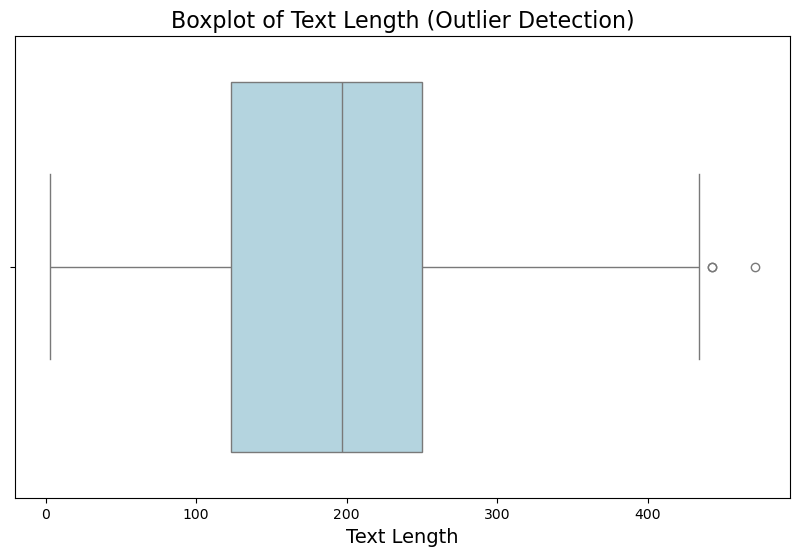

In [54]:
# Step 5: Visualize outliers using a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=data['text_length'], color='lightblue')
plt.title('Boxplot of Text Length (Outlier Detection)', fontsize=16)
plt.xlabel('Text Length', fontsize=14)
plt.show()

In [55]:
# Step 6: Remove outliers
data_no_outliers = data[(data['text_length'] >= lower_bound) & (data['text_length'] <= upper_bound)]
print(f'Dataset shape after removing outliers: {data_no_outliers.shape}')

Dataset shape after removing outliers: (1227, 24)


In [56]:
# Text Preprocessing
# Checking the datatype of columns
text_columns = data.select_dtypes(include='object').columns
print(text_columns)

Index(['title', 'product_description', 'reviews', 'reviews_rating',
       'Shoe Type', 'cleaned_reviews', 'sentiment_label'],
      dtype='object')


In [57]:
import nltk
import re
from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Function to clean text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to text columns
text_columns = ['reviews', 'title']
for col in text_columns:
    data[col] = data[col].astype(str).apply(preprocess_text)

data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title  price  rating  \
0        clymb outdoor sports running shoes mens boy    NaN     2.9   
1                   bourge mens loirez running shoes    NaN     3.9   
2                                 trock mens sneaker    NaN     3.3   
3  robbie jones sneakers casual canvas fabric col...    NaN     4.2   
4                            sparx mens sdg sneakers    NaN     4.2   

   total_reviews                                product_description  \
0            NaN  Elevate your style with this classy pair of Ru...   
1            NaN  The product will be an excellent pick for you....   
2            NaN  Flaunt with these stylish and unique red casua...   
3            NaN  Robbie Jones Shoes Are Designed To Keeping In ...   
4            NaN  Sparx is a spectacular range of footwear from ...   

                                             reviews  \
0  happy product expected average product pic bea...   
1  memory cushioning shoes best feature poor qual...   
2  worth amount go perfect star itam received wor...   
3                  sup quality good expected awesome   
4  best satisfied affordable beauty eye catcher e...   

                                      reviews_rating Shoe Type  \
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men   
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men   
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men   
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   

                                     cleaned_reviews  sentiment  ...  \
0  Not happy with product   It s not as expected ...  -0.115909  ...   
1  Memory cushioning in these shoes is the best f...   0.571364  ...   
2  Worth to its amount   Go for it   Perfect   5 ...   0.225000  ...   
3  Sup quality   Good but not expected   Awesome       0.583333  ...   
4  Best   Satisfied    Affordable beauty      the...   0.360000  ...   

  price_length  rating_length  total_reviews_length  \
0            7             18                    12   
1            7             18                    13   
2            7             18                    12   
3            7             18                     9   
4            7             18                    13   

   product_description_length  reviews_length  reviews_rating_length  \
0                         222             297                    207   
1                          78             300                    207   
2                         398             182                    207   
3                         576              49                     60   
4                        1030             324                    207   

   Shoe Type_length  cleaned_reviews_length  sentiment_label_length  \
0                 3                     297                       8   
1                 3                     300                       8   
2                 3                     182                       8   
3                 3                      49                       8   
4                 3                     324                       8   

   text_length  
0          297  
1          300  
2          182  
3           49  
4          324  

[5 rows x 24 columns]

In [58]:
# Stemming
# Initialize the stemmer
ps = PorterStemmer()

# Function to apply stemming
def apply_stemming(text):
    return ' '.join([ps.stem(word) for word in text.split()])

# Apply stemming to text columns
for col in text_columns:
    data[col + '_stemmed'] = data[col].apply(apply_stemming)

data.head()


title  price  rating  \
0        clymb outdoor sports running shoes mens boy    NaN     2.9   
1                   bourge mens loirez running shoes    NaN     3.9   
2                                 trock mens sneaker    NaN     3.3   
3  robbie jones sneakers casual canvas fabric col...    NaN     4.2   
4                            sparx mens sdg sneakers    NaN     4.2   

   total_reviews                                product_description  \
0            NaN  Elevate your style with this classy pair of Ru...   
1            NaN  The product will be an excellent pick for you....   
2            NaN  Flaunt with these stylish and unique red casua...   
3            NaN  Robbie Jones Shoes Are Designed To Keeping In ...   
4            NaN  Sparx is a spectacular range of footwear from ...   

                                             reviews  \
0  happy product expected average product pic bea...   
1  memory cushioning shoes best feature poor qual...   
2  worth amount go perfect star itam received wor...   
3                  sup quality good expected awesome   
4  best satisfied affordable beauty eye catcher e...   

                                      reviews_rating Shoe Type  \
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men   
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men   
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men   
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   

                                     cleaned_reviews  sentiment  ...  \
0  Not happy with product   It s not as expected ...  -0.115909  ...   
1  Memory cushioning in these shoes is the best f...   0.571364  ...   
2  Worth to its amount   Go for it   Perfect   5 ...   0.225000  ...   
3  Sup quality   Good but not expected   Awesome       0.583333  ...   
4  Best   Satisfied    Affordable beauty      the...   0.360000  ...   

  total_reviews_length  product_description_length  reviews_length  \
0                   12                         222             297   
1                   13                          78             300   
2                   12                         398             182   
3                    9                         576              49   
4                   13                        1030             324   

   reviews_rating_length  Shoe Type_length  cleaned_reviews_length  \
0                    207                 3                     297   
1                    207                 3                     300   
2                    207                 3                     182   
3                     60                 3                      49   
4                    207                 3                     324   

   sentiment_label_length  text_length  \
0                       8          297   
1                       8          300   
2                       8          182   
3                       8           49   
4                       8          324   

                                     reviews_stemmed  \
0  happi product expect averag product pic beauti...   
1  memori cushion shoe best featur poor qualiti p...   
2  worth amount go perfect star itam receiv worst...   
3                     sup qualiti good expect awesom   
4  best satisfi afford beauti eye catcher econom ...   

                                       title_stemmed  
0               clymb outdoor sport run shoe men boy  
1                          bourg men loirez run shoe  
2                                  trock men sneaker  
3  robbi jone sneaker casual canva fabric colour ...  
4                              sparx men sdg sneaker  

[5 rows x 26 columns]

In [59]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer

# Download the 'stopwords' and 'wordnet' datasets
nltk.download('stopwords')
nltk.download('wordnet')  # Download wordnet

# Function to clean text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to text columns
text_columns = ['reviews', 'title']
for col in text_columns:
    data[col] = data[col].astype(str).apply(preprocess_text)

data.head()

# Lematization
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply lemmatization to text columns
for col in text_columns:
    data[col + '_lemmatized'] = data[col].apply(apply_lemmatization)

data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


title  price  rating  \
0        clymb outdoor sports running shoes mens boy    NaN     2.9   
1                   bourge mens loirez running shoes    NaN     3.9   
2                                 trock mens sneaker    NaN     3.3   
3  robbie jones sneakers casual canvas fabric col...    NaN     4.2   
4                            sparx mens sdg sneakers    NaN     4.2   

   total_reviews                                product_description  \
0            NaN  Elevate your style with this classy pair of Ru...   
1            NaN  The product will be an excellent pick for you....   
2            NaN  Flaunt with these stylish and unique red casua...   
3            NaN  Robbie Jones Shoes Are Designed To Keeping In ...   
4            NaN  Sparx is a spectacular range of footwear from ...   

                                             reviews  \
0  happy product expected average product pic bea...   
1  memory cushioning shoes best feature poor qual...   
2  worth amount go perfect star itam received wor...   
3                  sup quality good expected awesome   
4  best satisfied affordable beauty eye catcher e...   

                                      reviews_rating Shoe Type  \
0  1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men   
1  5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men   
2  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   
3  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men   
4  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men   

                                     cleaned_reviews  sentiment  ...  \
0  Not happy with product   It s not as expected ...  -0.115909  ...   
1  Memory cushioning in these shoes is the best f...   0.571364  ...   
2  Worth to its amount   Go for it   Perfect   5 ...   0.225000  ...   
3  Sup quality   Good but not expected   Awesome       0.583333  ...   
4  Best   Satisfied    Affordable beauty      the...   0.360000  ...   

  reviews_length  reviews_rating_length  Shoe Type_length  \
0            297                    207                 3   
1            300                    207                 3   
2            182                    207                 3   
3             49                     60                 3   
4            324                    207                 3   

   cleaned_reviews_length  sentiment_label_length  text_length  \
0                     297                       8          297   
1                     300                       8          300   
2                     182                       8          182   
3                      49                       8           49   
4                     324                       8          324   

                                     reviews_stemmed  \
0  happi product expect averag product pic beauti...   
1  memori cushion shoe best featur poor qualiti p...   
2  worth amount go perfect star itam receiv worst...   
3                     sup qualiti good expect awesom   
4  best satisfi afford beauti eye catcher econom ...   

                                       title_stemmed  \
0               clymb outdoor sport run shoe men boy   
1                          bourg men loirez run shoe   
2                                  trock men sneaker   
3  robbi jone sneaker casual canva fabric colour ...   
4                              sparx men sdg sneaker   

                                  reviews_lemmatized  \
0  happy product expected average product pic bea...   
1  memory cushioning shoe best feature poor quali...   
2  worth amount go perfect star itam received wor...   
3                  sup quality good expected awesome   
4  best satisfied affordable beauty eye catcher e...   

                                    title_lemmatized  
0           clymb outdoor sport running shoe men boy  
1                     bourge men loirez running shoe  
2                                  trock men sneaker  
3  robbie jones sneaker casual 

In [60]:
from collections import Counter

# Function to get word frequency
def word_frequency(column):
    words = ' '.join(data[column]).split()
    word_count = Counter(words)
    return word_count.most_common(10)

# Get word frequency for lemmatized columns
for col in text_columns:
    print(f"Most common words in {col}_lemmatized:")
    print(word_frequency(col + '_lemmatized'))
    print('\n')

Most common words in reviews_lemmatized:
[('good', 1718), ('product', 1448), ('shoe', 1279), ('quality', 776), ('purchase', 766), ('verified', 703), ('nice', 583), ('comfortable', 571), ('report', 439), ('abuse', 439)]


Most common words in title_lemmatized:
[('shoe', 956), ('men', 852), ('running', 536), ('woman', 339), ('sneaker', 213), ('formal', 125), ('adidas', 110), ('casual', 94), ('puma', 92), ('sport', 83)]




C:\Users\devika\AppData\Local\Temp\ipykernel_508\3109307770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


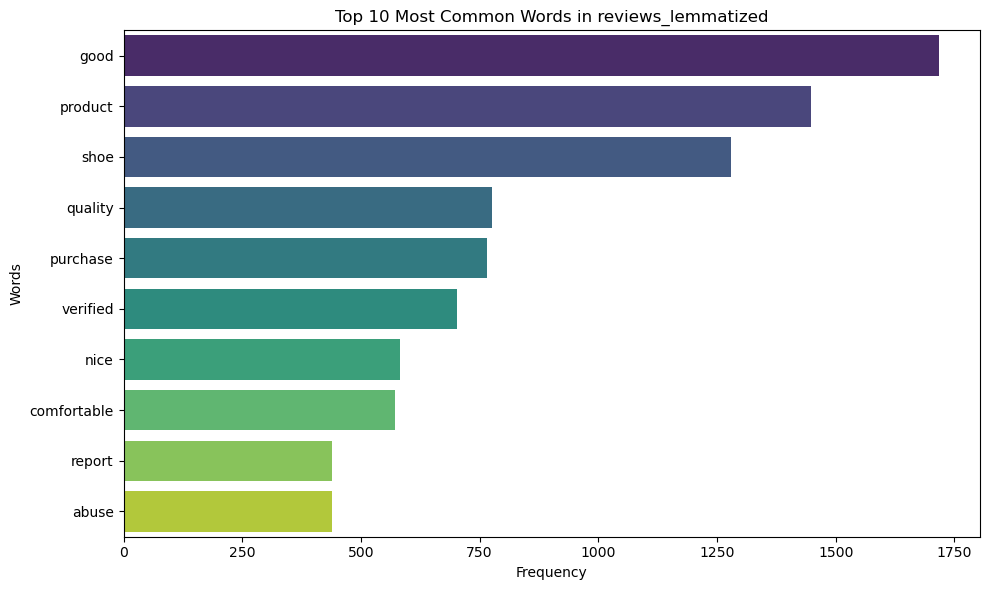

C:\Users\devika\AppData\Local\Temp\ipykernel_508\3109307770.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


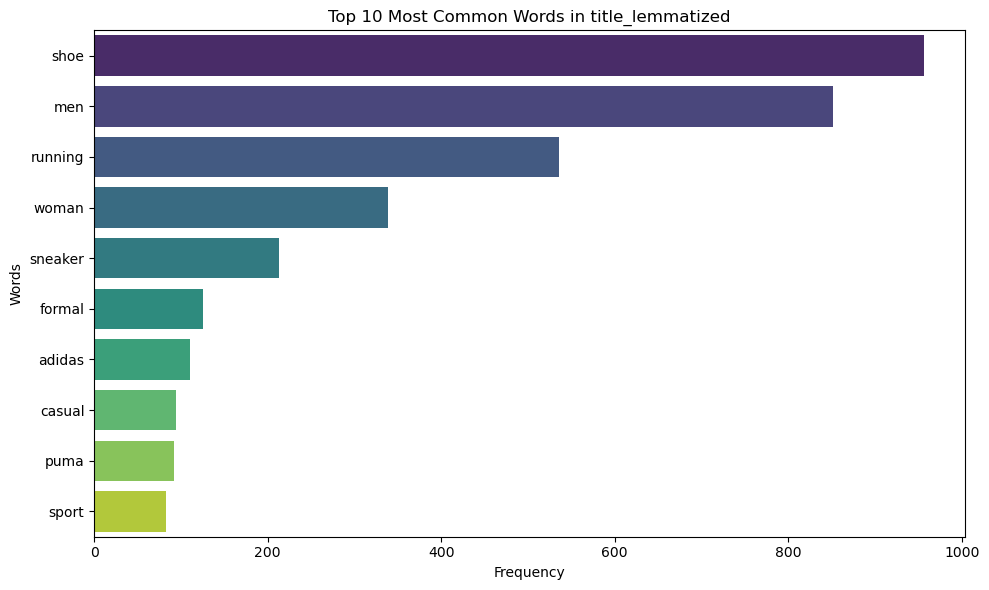

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to get word frequency
def word_frequency(column):
    words = ' '.join(data[column]).split()
    word_count = Counter(words)
    return word_count.most_common(10)

# Visualization for each column's most common words
for col in text_columns:
    most_common_words = word_frequency(col + '_lemmatized')

    # Unpack the words and their frequencies for plotting
    words, frequencies = zip(*most_common_words)

    # Create a bar plot for the most common words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=words, palette="viridis")
    plt.title(f"Top 10 Most Common Words in {col}_lemmatized")
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()

    # Show the plot
    plt.show()


Word Cloud for reviews_lemmatized:


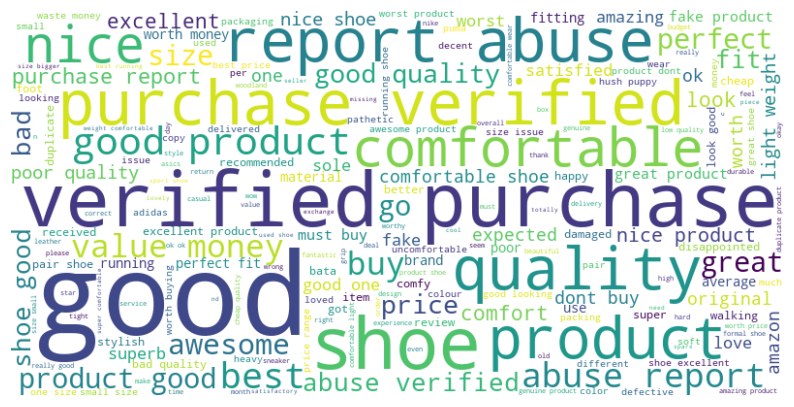

Word Cloud for title_lemmatized:


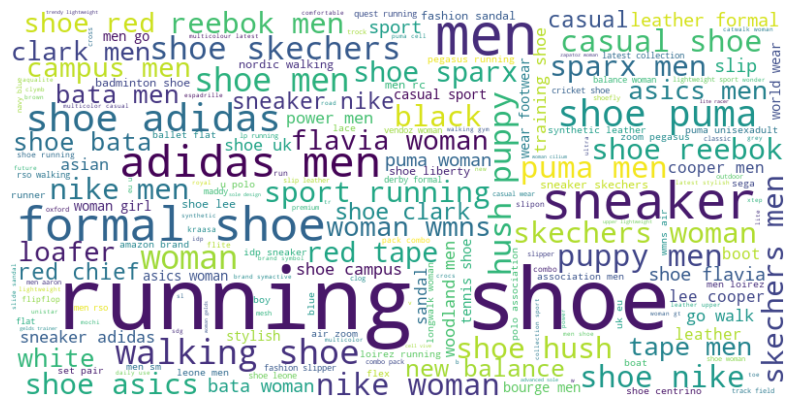

In [62]:
from wordcloud import WordCloud

# Plot word cloud for a given column
def plot_wordcloud(column):
    text = ' '.join(data[column])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Plot word cloud for lemmatized columns
for col in text_columns:
    print(f"Word Cloud for {col}_lemmatized:")
    plot_wordcloud(col + '_lemmatized')


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Convert the text data into Bag of Words format
bow_matrix = vectorizer.fit_transform(data['reviews_lemmatized'])

# Convert to DataFrame for better visualization
bow_data = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_data.head()


aa  aaaawwwsome  aayega  ab  ablable  able  absolute  absolutely  abuse  \
0   0            0       0   0        0     0         0           0      0   
1   0            0       0   0        0     0         0           0      0   
2   0            0       0   0        0     0         0           0      0   
3   0            0       0   0        0     0         0           0      0   
4   0            0       0   0        0     0         0           0      0   

   acceptable  ...  yay  year  yeh  yes  yet  young  yuck  yuuvi  zero  \
0           0  ...    0     0    0    0    0      0     0      0     0   
1           0  ...    0     0    0    0    0      0     0      0     0   
2           0  ...    0     0    0    0    0      0     0      0     0   
3           0  ...    0     0    0    0    0      0     0      0     0   
4           0  ...    0     0    0    0    0      0     0      0     0   

   zzzzbaaarddaasssttt  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 2243 columns]

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Convert the text data into Bag of Words format
bow_matrix = vectorizer.fit_transform(data['title_lemmatized'])

# Convert to DataFrame for better visualization
bow_data = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_data.head()

aadi  aaron  ac  action  adapt  adf  adidas  adifloss  adilette  adiset  \
0     0      0   0       0      0    0       0         0         0       0   
1     0      0   0       0      0    0       0         0         0       0   
2     0      0   0       0      0    0       0         0         0       0   
3     0      0   0       0      0    0       0         0         0       0   
4     0      0   0       0      0    0       0         0         0       0   

   ...  zampa  zapatoz  zeal  zebra  zelt  zeus  zig  zipper  zoe  zoom  
0  ...      0        0     0      0     0     0    0       0    0     0  
1  ...      0        0     0      0     0     0    0       0    0     0  
2  ...      0        0     0      0     0     0    0       0    0     0  
3  ...      0        0     0      0     0     0    0       0    0     0  
4  ...      0        0     0      0     0     0    0       0    0     0  

[5 rows x 1085 columns]

In [65]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [66]:
from textblob import TextBlob

# Function to calculate sentiment polarity and classify it
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Get sentiment polarity

    # Classify polarity into positive, negative, or neutral
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return polarity, sentiment

# Apply sentiment analysis and classification to the 'reviews_lemmatized' column
data['reviews_sentiment'], data['sentiment_category'] = zip(*data['reviews_lemmatized'].apply(get_sentiment))

# Display the results
data[['reviews_lemmatized', 'reviews_sentiment', 'sentiment_category']].head()



reviews_lemmatized  reviews_sentiment  \
0  happy product expected average product pic bea...          -0.057500   
1  memory cushioning shoe best feature poor quali...           0.586364   
2  worth amount go perfect star itam received wor...           0.225000   
3                  sup quality good expected awesome           0.533333   
4  best satisfied affordable beauty eye catcher e...           0.360000   

  sentiment_category  
0           Negative  
1           Positive  
2           Positive  
3           Positive  
4           Positive

Sentiment Analysis Results:
                                  reviews_lemmatized  reviews_sentiment  \
0  happy product expected average product pic bea...          -0.057500   
1  memory cushioning shoe best feature poor quali...           0.586364   
2  worth amount go perfect star itam received wor...           0.225000   
3                  sup quality good expected awesome           0.533333   
4  best satisfied affordable beauty eye catcher e...           0.360000   

  sentiment_category  
0           Negative  
1           Positive  
2           Positive  
3           Positive  
4           Positive  


C:\Users\devika\AppData\Local\Temp\ipykernel_508\1854715213.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=data, palette='Set2')


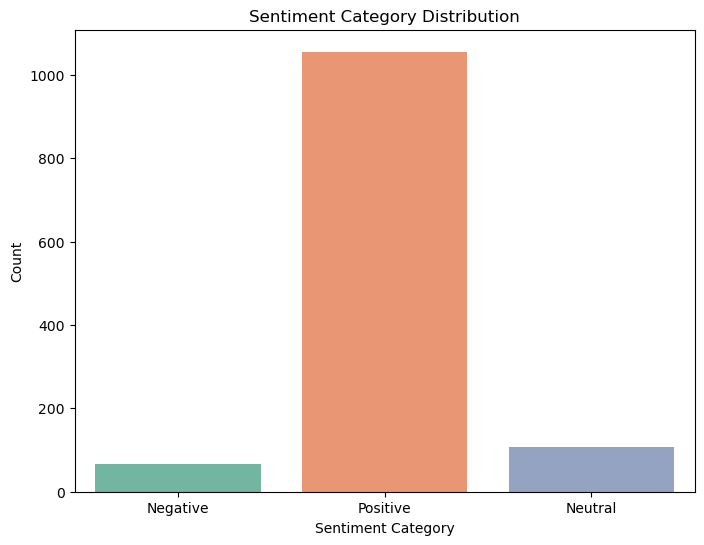

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Function to calculate sentiment polarity and classify it
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Get sentiment polarity

    # Classify polarity into positive, negative, or neutral
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return polarity, sentiment

# Apply sentiment analysis and classification to the 'reviews_lemmatized' column
data['reviews_sentiment'], data['sentiment_category'] = zip(*data['reviews_lemmatized'].apply(get_sentiment))

# Display the results
print("Sentiment Analysis Results:")
print(data[['reviews_lemmatized', 'reviews_sentiment', 'sentiment_category']].head())

# Visualization 1: Sentiment Category Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=data, palette='Set2')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


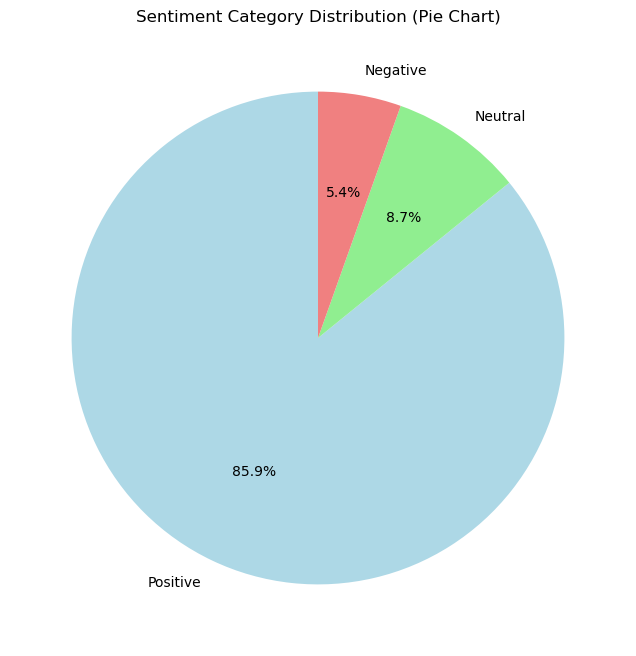

In [68]:
# Visualization 2: Sentiment Category Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
data['sentiment_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.title('Sentiment Category Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

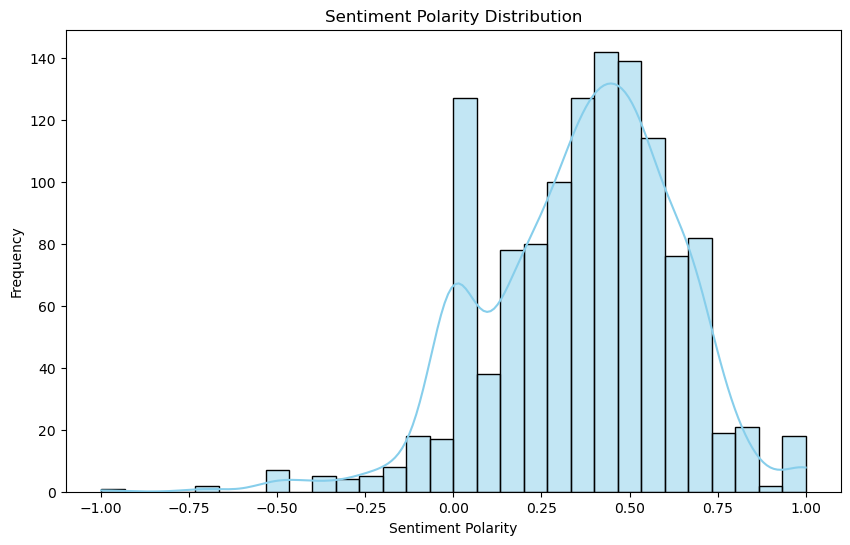

In [69]:
# Visualization 3: Sentiment Polarity Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['reviews_sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

C:\Users\devika\AppData\Local\Temp\ipykernel_508\2599545740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_category', y='reviews_sentiment', data=data, palette='Set1')


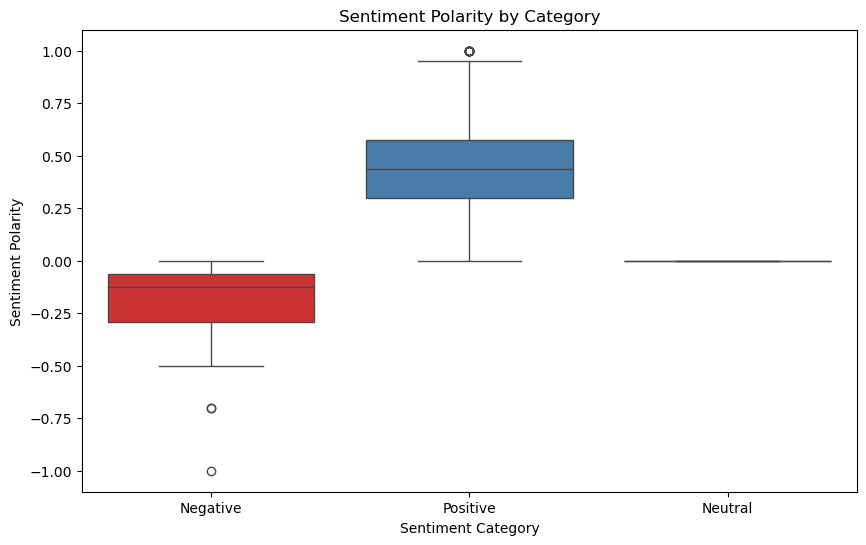

In [70]:
# Visualization 4: Sentiment Polarity by Category (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='reviews_sentiment', data=data, palette='Set1')
plt.title('Sentiment Polarity by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.show()

In [71]:
from textblob import TextBlob

# Function to calculate sentiment polarity and classify it
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Get sentiment polarity

    # Classify polarity into positive, negative, or neutral
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return polarity, sentiment

# Apply sentiment analysis and classification to the 'reviews_lemmatized' column
data['title_sentiment'], data['sentiment_category'] = zip(*data['title_lemmatized'].apply(get_sentiment))

# Display the results
data[['title_lemmatized', 'title_sentiment', 'sentiment_category']].head()



title_lemmatized  title_sentiment  \
0           clymb outdoor sport running shoe men boy              0.0   
1                     bourge men loirez running shoe              0.0   
2                                  trock men sneaker              0.0   
3  robbie jones sneaker casual canvas fabric colo...             -0.5   
4                              sparx men sdg sneaker              0.0   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3           Negative  
4            Neutral

Sentiment Analysis Results:
                                    title_lemmatized  title_sentiment  \
0           clymb outdoor sport running shoe men boy              0.0   
1                     bourge men loirez running shoe              0.0   
2                                  trock men sneaker              0.0   
3  robbie jones sneaker casual canvas fabric colo...             -0.5   
4                              sparx men sdg sneaker              0.0   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3           Negative  
4            Neutral  


C:\Users\devika\AppData\Local\Temp\ipykernel_508\3825040097.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=data, palette='Set2')


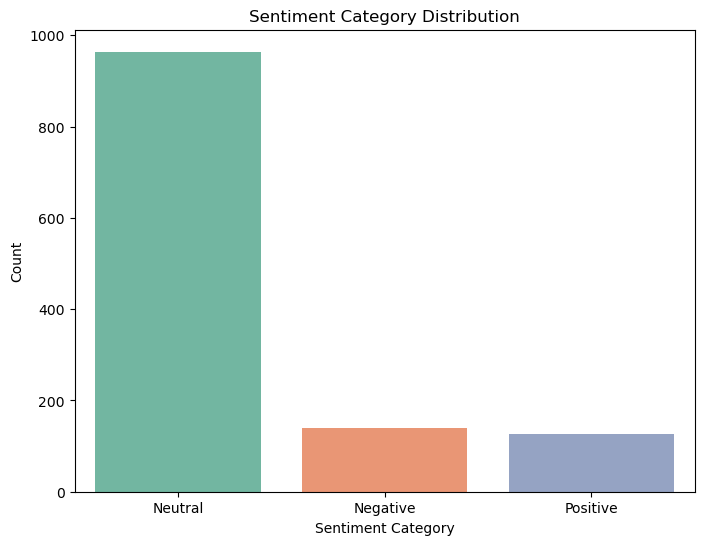

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the results
print("Sentiment Analysis Results:")
print(data[['title_lemmatized', 'title_sentiment', 'sentiment_category']].head())

# Visualization 1: Sentiment Category Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=data, palette='Set2')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

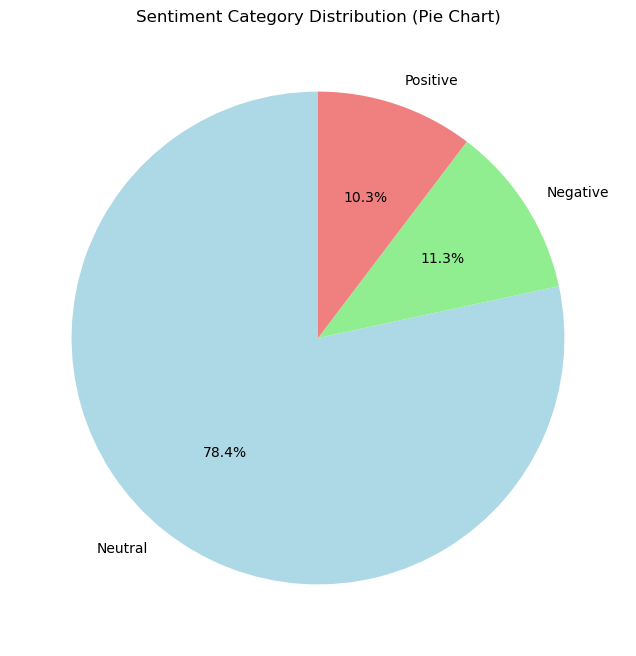

In [73]:
# Visualization 2: Sentiment Category Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
data['sentiment_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
plt.title('Sentiment Category Distribution (Pie Chart)')
plt.ylabel('')  # No label for y-axis in pie chart
plt.show()

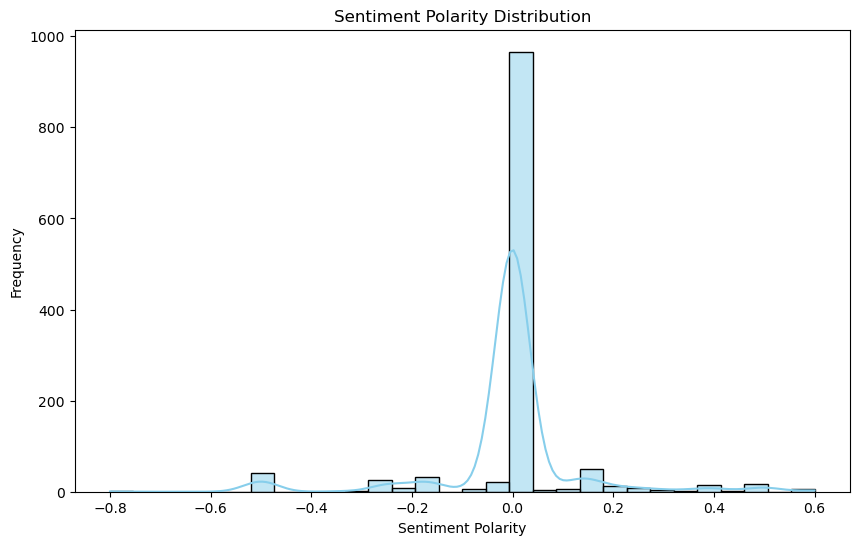

In [74]:
# Visualization 3: Sentiment Polarity Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['title_sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

C:\Users\devika\AppData\Local\Temp\ipykernel_508\9541192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_category', y='title_sentiment', data=data, palette='Set1')


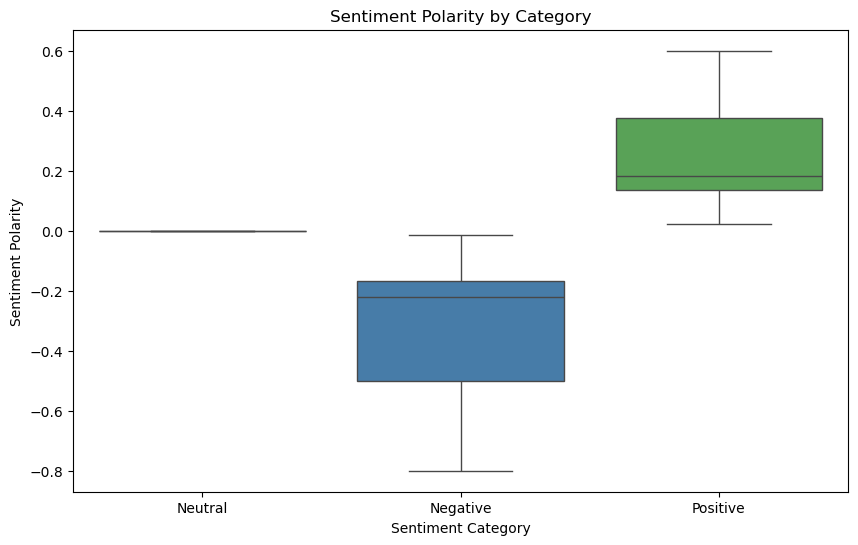

In [75]:
# Visualization 4: Sentiment Polarity by Category (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='title_sentiment', data=data, palette='Set1')
plt.title('Sentiment Polarity by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Polarity')
plt.show()

In [76]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data= pd.read_csv('C:\\Users\\devika\\OneDrive\\Desktop\\new data.csv')
data

title  price  rating  \
0           clymb outdoor sports running shoes mens boy    NaN     2.9   
1                      bourge mens loirez running shoes    NaN     3.9   
2                                    trock mens sneaker    NaN     3.3   
3     robbie jones sneakers casual canvas fabric col...    NaN     4.2   
4                               sparx mens sdg sneakers    NaN     4.2   
...                                                 ...    ...     ...   
1225               nike mens react vision running shoes    NaN     4.4   
1226        puma mens bog limitless hi evoknit sneakers    NaN     4.3   
1227  new balance womens fuelcell echolucent running...    NaN     4.5   
1228     nike womens wmns air zoom pegasus running shoe    NaN     4.5   
1229              asics women gt liteshow running shoes    NaN     4.1   

      total_reviews                                product_description  \
0               NaN  Elevate your style with this classy pair of Ru...   
1               NaN  The product will be an excellent pick for you....   
2               NaN  Flaunt with these stylish and unique red casua...   
3               NaN  Robbie Jones Shoes Are Designed To Keeping In ...   
4               NaN  Sparx is a spectacular range of footwear from ...   
...             ...                                                ...   
1225            NaN  The Nike react vision is a STORY of surreal co...   
1226            NaN  The B.O.G limitless is Puma's key style for th...   
1227            NaN  Lead the pack in New Balance’s Echolucent snea...   
1228            NaN  Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...   
1229            NaN  The GT-2000 7 achieves a reassuringly firm rid...   

                                                reviews  \
0     happy product expected average product pic bea...   
1     memory cushioning shoes best feature poor qual...   
2     worth amount go perfect star itam received wor...   
3                     sup quality good expected awesome   
4     best satisfied affordable beauty eye catcher e...   
...                                                 ...   
1225  must buy great fiting great quality report abu...   
1226  worth buying classy bold stylish great product...   
1227  size variation product recd n size chart repor...   
1228  verified purchase verified purchase verified p...   
1229  great shoe excellent quality old manufactured ...   

                                         reviews_rating Shoe Type  word_count  \
0     1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...       Men          35   
1     5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...       Men          14   
2     5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men          70   
3     5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...       Men         100   
4     5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...       Men         171   
...                                                 ...       ...         ...   
1225  5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...     Women          39   
1226  4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...     Women         141   
1227  5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...     Women          51   
1228  5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...     Women         222   
1229  5.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...     Women          24   

      char_count  ...  reviews_rating_length  Shoe Type_length  text_length  \
0            222  ...                    207                 3          297   
1             78  ...                    207                 3          300   
2            398  ...                    207                 3          182   
3            576  ...                     60                 3           49   
4           1030  ...                    207                 3          324   
...          ...  ...                    ...               ...          ...   
1225         237  ...                

# LOGESTIC REGRESSION

In [77]:
data['sentiment_encoded'] = data['sentiment_encoded']+1

In [78]:
X = data['reviews_lemmatized']
y = data['sentiment_encoded']

In [79]:
X

0       happy product expected average product pic bea...
1       memory cushioning shoe best feature poor quali...
2       worth amount go perfect star itam received wor...
3                       sup quality good expected awesome
4       best satisfied affordable beauty eye catcher e...
                              ...                        
1225    must buy great fiting great quality report abu...
1226    worth buying classy bold stylish great product...
1227    size variation product recd n size chart repor...
1228    verified purchase verified purchase verified p...
1229    great shoe excellent quality old manufactured ...
Name: reviews_lemmatized, Length: 1230, dtype: object

In [80]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [82]:
# Model training - Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [83]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [84]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2], dtype=int64)

In [85]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.06%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.58      0.61      0.59        18
           2       0.94      0.97      0.95       218

    accuracy                           0.91       246
   macro avg       0.84      0.59      0.63       246
weighted avg       0.91      0.91      0.90       246



# DECISION TREE

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
# Model training - Logistic Regression
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [88]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [89]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 93.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.88      0.78      0.82        18
           2       0.96      0.97      0.96       218

    accuracy                           0.93       246
   macro avg       0.78      0.75      0.76       246
weighted avg       0.93      0.93      0.93       246



# RANDOM FOREST

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
# Model training - Logistic Regression
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [92]:
y_pred = model.predict(X_test_tfidf)

In [93]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.12%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.93      0.72      0.81        18
           2       0.95      1.00      0.97       218

    accuracy                           0.95       246
   macro avg       0.96      0.71      0.79       246
weighted avg       0.95      0.95      0.95       246



# SVM

In [94]:
from sklearn.svm import SVC

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [96]:
svm_model = SVC(kernel='linear', gamma="scale", C=10)  # Linear kernel for text classification
svm_model.fit(X_train_tfidf, y_train)

SVC(C=10, kernel='linear')

In [97]:
y_pred = svm_model.predict(X_test_tfidf)

In [98]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 92.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.62      0.83      0.71        18
           2       0.97      0.95      0.96       218

    accuracy                           0.93       246
   macro avg       0.74      0.76      0.74       246
weighted avg       0.93      0.93      0.93       246



# NAIVE BAYES

In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
from sklearn.model_selection import GridSearchCV

# Set up the grid of hyperparameters
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and model score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


Best Parameters: {'alpha': 0.1}
Best Cross-Validation Score: 0.9085465658344557


In [101]:
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [102]:
y_pred = nb_model.predict(X_test_tfidf)

In [103]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.46%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.59      0.72      0.65        18
           2       0.95      0.96      0.95       218

    accuracy                           0.91       246
   macro avg       0.85      0.63      0.65       246
weighted avg       0.92      0.91      0.91       246



BERT (Bidirectional Encoder Representations from Transformers)
# This is best for complex sentiment analysis tasks where subtle language cues(eg. sarcasm, irony) matter, such as reviews

In [104]:
!pip install datasets

In [105]:
!pip install datasets transformers torch sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [106]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [107]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

In [108]:

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [109]:
X_train

753     comfortable formal shoe till date worth every ...
1068    original dont buy durable excellent shoe preve...
1182    got different colour good shoe keeping best sh...
425                        good product good quality bata
644     excellent product fit pefectly size comfortabl...
                              ...                        
1044    expect initially bit uncomfortable week going ...
1095    nice pair fantastic shoe luv really good go go...
1130    comfortable stylish report abuse report abuse ...
860     shoe wrong colour shoe delivered still decent ...
1126    excellent report abuse report abuse report abu...
Name: reviews_lemmatized, Length: 984, dtype: object

In [ ]:
#Converting data to list
X_train_text = X_train.tolist()
X_test_text = X_test.tolist()


In [111]:
# Tokenize the lemmatized text data
train_encodings = tokenizer(X_train_text, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test_text, truncation=True, padding=True, max_length=128)

In [112]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [131]:
from torch.utils.data import Dataset


In [132]:
import torch
from torch.utils.data import Dataset

# Define a custom dataset class for PyTorch
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Assuming `train_encodings` is a dictionary with 'input_ids' and 'attention_mask'
# and `y_train` is your label data
train_dataset = CustomDataset(train_encodings, y_train)


In [133]:
from datasets import Dataset

# Convert to a Hugging Face dataset
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': y_train
})


In [134]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [135]:
import torch
print(torch.__version__)  # Should print the version of PyTorch installed


2.5.0+cpu


In [119]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [120]:
import torch

In [121]:
pip install --upgrade accelerate


Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install transformers[torch]


In [123]:
import accelerate
import transformers

print("Accelerate version:", accelerate.__version__)
print("Transformers version:", transformers.__version__)


Accelerate version: 1.0.1
Transformers version: 4.45.2


In [124]:
import sys
print(sys.executable)


C:\navigator\python.exe


In [125]:
!pip show torch
!pip show transformers
!pip show accelerate


Name: torch
Version: 2.5.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\navigator\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: accelerate
Name: transformers
Version: 4.45.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\navigator\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
Name: accelerate
Version: 1.0.1
Summary: Accelerate
Home-page: https://github.c

In [126]:
pip install --upgrade accelerate


Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install --upgrade accelerate


Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install --upgrade torch


Note: you may need to restart the kernel to use updated packages.


In [129]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',         # Output directory
    evaluation_strategy="epoch",    # Evaluate every epoch
    per_device_train_batch_size=16, # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    num_train_epochs=3,             # Number of training epochs
    weight_decay=0.01,              # Strength of weight decay
    logging_dir='./logs',           # Directory for storing logs
    logging_steps=10,
)


C:\navigator\Lib\site-packages\transformers\training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [137]:
from datasets import Dataset
from transformers import BertTokenizer

# 1. Prepare your test data
# Replace these with your actual test sentences and labels
test_texts = ["Your test sentence 1", "Your test sentence 2"]  # Example test sentences
test_labels = [0, 1]  # Example test labels

# 2. Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenize and encode the test texts
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# 4. Convert to Dataset
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

# Now test_dataset is defined and can be used in your Trainer


In [138]:
# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [139]:
# Train the model
trainer.train()

TrainOutput(global_step=186, training_loss=0.21454449614850424, metrics={'train_runtime': 956.9407, 'train_samples_per_second': 3.085, 'train_steps_per_second': 0.194, 'total_flos': 91020797945280.0, 'train_loss': 0.21454449614850424, 'epoch': 3.0})

In [140]:
# Evaluate the model
trainer.evaluate()

{'eval_loss': 1.508278250694275,
 'eval_runtime': 0.1074,
 'eval_samples_per_second': 18.616,
 'eval_steps_per_second': 9.308,
 'epoch': 3.0}

In [141]:
predictions, labels, _ = trainer.predict(test_dataset)
preds = predictions.argmax(axis=1)

In [142]:
accuracy = accuracy_score(labels, preds)
print(f"Accuracy: {accuracy*100:.2f}%")

# Detailed classification report
report = classification_report(labels, preds)
print(report)

Accuracy: 50.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\navigator\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
